In [60]:
import warnings
warnings.filterwarnings('ignore')

import math
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import AutoMinorLocator

plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['savefig.facecolor'] = 'white'

data_dir = '/home/mnedal/data'

# solar radius in arcsec in instruments FoV
rsun_aia      = 949.556184
rsun_suvi     = 949.1129337297962
rsun_lasco_c2 = 948.9823639616588
rsun_lasco_c3 = 948.9798944687567

# 1.	Blues
# 2.	Greens
# 3.	Greys
# 4.	Oranges
# 5.	Purples
# 6.	Reds

plt.rcParams.update({
    'axes.titlesize': 14,
    'axes.labelsize': 14,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14
})

In [3]:
def generate_centered_list(center, difference, num_elements):
    """
    Generate a list of numbers centered around a given number with a specified difference
    between consecutive numbers.

    Parameters:
    center (int): The central number around which the list is generated.
    difference (int): The difference between consecutive numbers in the list.
    num_elements (int): The number of elements before and after the central number.

    Returns:
    list: A list of numbers centered around the specified central number.
    """
    return [center + difference * i for i in range(-num_elements, num_elements + 1)]

In [4]:
centered_list = generate_centered_list(160, 2, 6)
print(centered_list)

[148, 150, 152, 154, 156, 158, 160, 162, 164, 166, 168, 170, 172]


## Plot points from J-maps and type-IIs with error bars in one height-time profile

In [5]:
radio_filenames = glob.glob(f'{data_dir}/ccuddy/*.csv')
print(len(radio_filenames), *radio_filenames, sep='\n')

14
/home/mnedal/data/ccuddy/burst1HH_stats.csv
/home/mnedal/data/ccuddy/burst2F_stats.csv
/home/mnedal/data/ccuddy/burst3HH_stats.csv
/home/mnedal/data/ccuddy/burst3MF_stats.csv
/home/mnedal/data/ccuddy/burst3HF_stats.csv
/home/mnedal/data/ccuddy/burst3MH_stats.csv
/home/mnedal/data/ccuddy/burst2H_stats.csv
/home/mnedal/data/ccuddy/burst1HF_stats.csv
/home/mnedal/data/ccuddy/burst1LH_stats.csv
/home/mnedal/data/ccuddy/burst3LH_stats.csv
/home/mnedal/data/ccuddy/burst4H_stats.csv
/home/mnedal/data/ccuddy/burst3LF_stats.csv
/home/mnedal/data/ccuddy/burst4F_stats.csv
/home/mnedal/data/ccuddy/burst1LF_stats.csv


In [6]:
suvi_filenames = sorted(glob.glob(f'{data_dir}/jplots/suvi/clicking/*.csv'))
print(len(suvi_filenames), *suvi_filenames, sep='\n')

# # Filter file paths that end with any of the specified numbers
# filtered_suvi_paths = [
#     path for path in suvi_click_filenames
#     if int(os.path.splitext(path)[0].split('_')[-1]) in centered_list
# ]

13
/home/mnedal/data/jplots/suvi/clicking/jmap_SUVI 195A_20240514_slit_148.csv
/home/mnedal/data/jplots/suvi/clicking/jmap_SUVI 195A_20240514_slit_150.csv
/home/mnedal/data/jplots/suvi/clicking/jmap_SUVI 195A_20240514_slit_152.csv
/home/mnedal/data/jplots/suvi/clicking/jmap_SUVI 195A_20240514_slit_154.csv
/home/mnedal/data/jplots/suvi/clicking/jmap_SUVI 195A_20240514_slit_156.csv
/home/mnedal/data/jplots/suvi/clicking/jmap_SUVI 195A_20240514_slit_158.csv
/home/mnedal/data/jplots/suvi/clicking/jmap_SUVI 195A_20240514_slit_160.csv
/home/mnedal/data/jplots/suvi/clicking/jmap_SUVI 195A_20240514_slit_162.csv
/home/mnedal/data/jplots/suvi/clicking/jmap_SUVI 195A_20240514_slit_164.csv
/home/mnedal/data/jplots/suvi/clicking/jmap_SUVI 195A_20240514_slit_166.csv
/home/mnedal/data/jplots/suvi/clicking/jmap_SUVI 195A_20240514_slit_168.csv
/home/mnedal/data/jplots/suvi/clicking/jmap_SUVI 195A_20240514_slit_170.csv
/home/mnedal/data/jplots/suvi/clicking/jmap_SUVI 195A_20240514_slit_172.csv


In [7]:
df_radio = pd.read_csv(radio_filenames[0])
df_radio.head()

Unnamed: 0       t_means     t_medians  t_standard_errors  h1_means  \
0           0  19857.729658  19857.729658           0.000001  1.279344   
1           1  19857.729739  19857.729740           0.000002  1.284279   
2           2  19857.729833  19857.729832           0.000001  1.288074   
3           3  19857.729921  19857.729921           0.000002  1.291907   
4           4  19857.730007  19857.730008           0.000002  1.303855   

   h1_medians  h1_standard_errors  h2_means  h2_medians  h2_standard_errors  \
0    1.278354            0.001003  1.404559    1.403365            0.001209   
1    1.284463            0.000488  1.410509    1.410730            0.000588   
2    1.288004            0.000576  1.415088    1.415003            0.000696   
3    1.291906            0.000505  1.419716    1.419713            0.000610   
4    1.301763            0.002188  1.434161    1.431627            0.002649   

   h3_means  h3_medians  h3_standard_errors  h4_means  h4_medians  \
0  1.489857    1.488513            0.001361  1.556944    1.555475   
1  1.496554    1.496802            0.000662  1.564258    1.564529   
2  1.501709    1.501614            0.000784  1.569891    1.569787   
3  1.506922    1.506919            0.000687  1.575589    1.575586   
4  1.523209    1.520348            0.002989  1.593406    1.590273   

   h4_standard_errors     f_means   f_medians  f_standard_errors  
0            0.001486  177.807192  178.332993           0.540921  
1            0.000723  175.162026  175.062657           0.259101  
2            0.000856  173.175863  173.208704           0.299791  
3            0.000751  171.202344  171.200613           0.256809  
4            0.003272  165.311403  166.282091           1.039000

In [8]:
updated_radio_filenames = glob.glob(f'{data_dir}/ccuddy/updated/*.csv')
print(len(updated_radio_filenames), *updated_radio_filenames, sep='\n')

14
/home/mnedal/data/ccuddy/updated/hs_3HF.csv
/home/mnedal/data/ccuddy/updated/hs_3HH.csv
/home/mnedal/data/ccuddy/updated/hs_3LF.csv
/home/mnedal/data/ccuddy/updated/hs_3LH.csv
/home/mnedal/data/ccuddy/updated/hs_4F.csv
/home/mnedal/data/ccuddy/updated/hs_4H.csv
/home/mnedal/data/ccuddy/updated/hs_3MF.csv
/home/mnedal/data/ccuddy/updated/hs_3MH.csv
/home/mnedal/data/ccuddy/updated/hs_1HF.csv
/home/mnedal/data/ccuddy/updated/hs_1HH.csv
/home/mnedal/data/ccuddy/updated/hs_1LF.csv
/home/mnedal/data/ccuddy/updated/hs_1LH.csv
/home/mnedal/data/ccuddy/updated/hs_2F.csv
/home/mnedal/data/ccuddy/updated/hs_2H.csv


In [9]:
df_radio = pd.read_csv(updated_radio_filenames[0])
df_radio.head()

Unnamed: 0          Time  1 Newkirk  2 Newkirk  3 Newkirk  4 Newkirk  \
0           0  19857.733540   1.314228   1.446718   1.537378   1.608915   
1           1  19857.733598   1.314288   1.446789   1.537459   1.609003   
2           2  19857.733651   1.314838   1.447457   1.538213   1.609829   
3           3  19857.733709   1.315483   1.448239   1.539096   1.610796   
4           4  19857.733766   1.318136   1.451454   1.542728   1.614774   

   Modified Newkirk   Leblanc      Mann     Saito     Allen  
0          1.042978  1.006336  1.021339  1.127980  1.180067  
1          1.043070  1.006395  1.021375  1.128043  1.180115  
2          1.043920  1.006937  1.021710  1.128632  1.180558  
3          1.044917  1.007572  1.022102  1.129321  1.181078  
4          1.049026  1.010180  1.023714  1.132151  1.183217

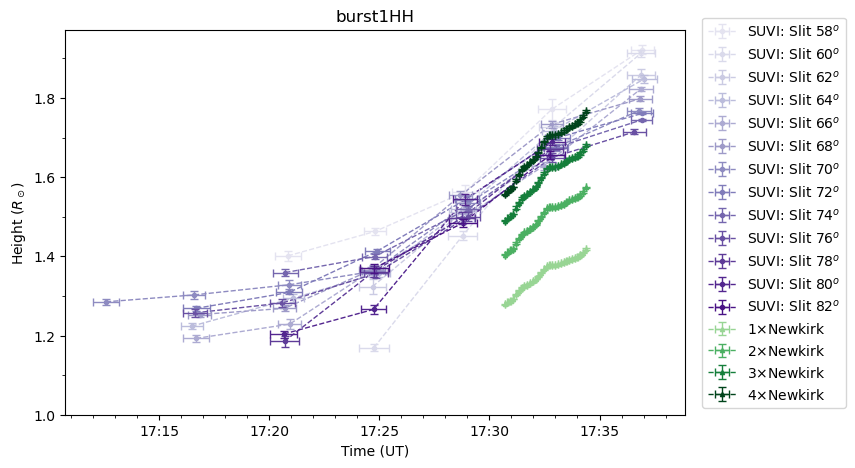

In [10]:
cmap_radio = plt.get_cmap('Greens')
colors_radio = [cmap_radio(i / 5) for i in range(1, 6)]

cmap_suvi = plt.get_cmap('Purples') # Purples, Greys
color_offset = 3
colors_suvi = [cmap_suvi((i+color_offset) / (len(suvi_filenames)+color_offset)) for i in range(len(suvi_filenames))]


# RADIO CURVES ...
for file in radio_filenames[:1]:
    df_radio = pd.read_csv(file)
    x = df_radio['t_means']
    
    fig = plt.figure(figsize=[8,5])
    ax = fig.add_subplot(111)

    # SUVI CURVES ...
    for i, suvifile in enumerate(suvi_filenames):
        df_suvi = pd.read_csv(suvifile)

        # rename the slit angle to be PA
        PA = int(suvifile.split('slit')[-1][1:4]) - 90
        
        ax.errorbar(df_suvi['x_mean'], df_suvi['y_mean']/rsun_suvi,
                    xerr=df_suvi['x_err'], yerr=df_suvi['y_err']/rsun_suvi,
                    markersize=3, linewidth=1,
                    fmt='o--', capsize=3, capthick=1, barsabove=True, color=colors_suvi[i],
                    ecolor=colors_suvi[i], label=f"SUVI: Slit {PA}$^o$")

    # RADIO CURVES ...
    for i in range(1, 5):
        y = df_radio[f'h{i}_means']
        ax.errorbar(x, y, xerr=df_radio['t_standard_errors'], yerr=df_radio[f'h{i}_standard_errors'],
                    markersize=3, linewidth=1,
                    fmt='^--', capsize=3, capthick=1, barsabove=True, color=colors_radio[i],
                    ecolor=colors_radio[i], label=f'{i}$\\times$Newkirk')

    ax.set_title(f"{file.split('/')[-1].split('_')[0]}")
    ax.legend(loc='lower right', bbox_to_anchor=(1.27,0))
    ax.xaxis_date()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax.xaxis.set_minor_locator(AutoMinorLocator(n=5))
    ax.yaxis.set_minor_locator(AutoMinorLocator(n=2))
    ax.set_ylim(bottom=1)
    ax.set_xlabel('Time (UT)')
    ax.set_ylabel(r'Height ($R_\odot$)')
    # fig.savefig(f"/home/mnedal/repos/dias_work/jplots/all_clicking/suvi_radio/suvi_{file.split('/')[-1].split('_')[0]}.pdf", format='pdf', bbox_inches='tight')
    # fig.savefig(f"/home/mnedal/repos/dias_work/jplots/all_clicking/suvi_{file.split('/')[-1].split('_')[0]}.png", format='png', dpi=300, bbox_inches='tight')
    plt.show()

In [11]:
c2_click_filenames = sorted(glob.glob(f'{data_dir}/jplots/lasco_C2/clicking/*.csv'))
print(len(c2_click_filenames), *c2_click_filenames, sep='\n')

16
/home/mnedal/data/jplots/lasco_C2/clicking/jmap_LASCO_C2_20240514_slit_130.csv
/home/mnedal/data/jplots/lasco_C2/clicking/jmap_LASCO_C2_20240514_slit_148.csv
/home/mnedal/data/jplots/lasco_C2/clicking/jmap_LASCO_C2_20240514_slit_150.csv
/home/mnedal/data/jplots/lasco_C2/clicking/jmap_LASCO_C2_20240514_slit_152.csv
/home/mnedal/data/jplots/lasco_C2/clicking/jmap_LASCO_C2_20240514_slit_154.csv
/home/mnedal/data/jplots/lasco_C2/clicking/jmap_LASCO_C2_20240514_slit_156.csv
/home/mnedal/data/jplots/lasco_C2/clicking/jmap_LASCO_C2_20240514_slit_158.csv
/home/mnedal/data/jplots/lasco_C2/clicking/jmap_LASCO_C2_20240514_slit_160.csv
/home/mnedal/data/jplots/lasco_C2/clicking/jmap_LASCO_C2_20240514_slit_162.csv
/home/mnedal/data/jplots/lasco_C2/clicking/jmap_LASCO_C2_20240514_slit_164.csv
/home/mnedal/data/jplots/lasco_C2/clicking/jmap_LASCO_C2_20240514_slit_166.csv
/home/mnedal/data/jplots/lasco_C2/clicking/jmap_LASCO_C2_20240514_slit_168.csv
/home/mnedal/data/jplots/lasco_C2/clicking/jmap_L

130, 190, 195 slits are not needed.

In [12]:
c3_click_filenames = sorted(glob.glob(f'{data_dir}/jplots/lasco_C3/clicking/*.csv'))
print(len(c3_click_filenames), *c3_click_filenames, sep='\n')

13
/home/mnedal/data/jplots/lasco_C3/clicking/jmap_LASCO_C3_20240514_slit_148.csv
/home/mnedal/data/jplots/lasco_C3/clicking/jmap_LASCO_C3_20240514_slit_150.csv
/home/mnedal/data/jplots/lasco_C3/clicking/jmap_LASCO_C3_20240514_slit_152.csv
/home/mnedal/data/jplots/lasco_C3/clicking/jmap_LASCO_C3_20240514_slit_154.csv
/home/mnedal/data/jplots/lasco_C3/clicking/jmap_LASCO_C3_20240514_slit_156.csv
/home/mnedal/data/jplots/lasco_C3/clicking/jmap_LASCO_C3_20240514_slit_158.csv
/home/mnedal/data/jplots/lasco_C3/clicking/jmap_LASCO_C3_20240514_slit_160.csv
/home/mnedal/data/jplots/lasco_C3/clicking/jmap_LASCO_C3_20240514_slit_162.csv
/home/mnedal/data/jplots/lasco_C3/clicking/jmap_LASCO_C3_20240514_slit_164.csv
/home/mnedal/data/jplots/lasco_C3/clicking/jmap_LASCO_C3_20240514_slit_166.csv
/home/mnedal/data/jplots/lasco_C3/clicking/jmap_LASCO_C3_20240514_slit_168.csv
/home/mnedal/data/jplots/lasco_C3/clicking/jmap_LASCO_C3_20240514_slit_170.csv
/home/mnedal/data/jplots/lasco_C3/clicking/jmap_L

In [16]:
df_c2 = pd.read_csv(c2_click_filenames[0])
df_c2.head()

Unnamed: 0          time     distance     x_err      y_err        x_mean  \
0           0  19857.741721  2364.079332  0.001546  37.413663  19857.741721   
1           1  19857.749948  3660.339476  0.001491  48.611951  19857.749948   
2           2  19857.758373  5037.803852  0.001464  56.436923  19857.758373   
3           3  19857.766617  6291.958098  0.001445  71.409859  19857.766617   
4           4  19857.774910  7188.212211  0.001427  47.279540  19857.774910   

        y_mean   distance_km  distance_diff_km  \
0  2364.079332  1.733109e+06               NaN   
1  3660.339476  2.683399e+06      9.502897e+05   
2  5037.803852  3.693219e+06      1.009821e+06   
3  6291.958098  4.612641e+06      9.194218e+05   
4  7188.212211  5.269686e+06      6.570449e+05   

                           datetime  time_diff_s   speed_km_s  
0  2024-05-14 17:48:04.701006+00:00          NaN          NaN  
1  2024-05-14 17:59:55.546952+00:00   710.845946  1336.843408  
2  2024-05-14 18:12:03.453200+00:00   727.906248  1387.294902  
3  2024-05-14 18:23:55.720838+00:00   712.267638  1290.837585  
4  2024-05-14 18:35:52.253552+00:00   716.532714   916.978178

In [15]:
df_c3 = pd.read_csv(c3_click_filenames[0])
df_c3.head()

Unnamed: 0          time      distance   distance_km  distance_diff_km  \
0           0  19857.753933   4693.726809  3.440985e+06               NaN   
1           1  19857.762375   6160.146104  4.516022e+06      1.075036e+06   
2           2  19857.770753   7587.975417  5.562767e+06      1.046746e+06   
3           3  19857.778747   9035.099722  6.623659e+06      1.060891e+06   
4           4  19857.787253  10250.684137  7.514807e+06      8.911486e+05   

                           datetime  time_diff_s   speed_km_s  
0  2024-05-14 18:05:39.809924+00:00          NaN          NaN  
1  2024-05-14 18:17:49.192020+00:00   729.382096  1473.900139  
2  2024-05-14 18:29:53.048494+00:00   723.856474  1446.068357  
3  2024-05-14 18:41:23.751236+00:00   690.702742  1535.959093  
4  2024-05-14 18:53:38.658953+00:00   734.907717  1212.599285

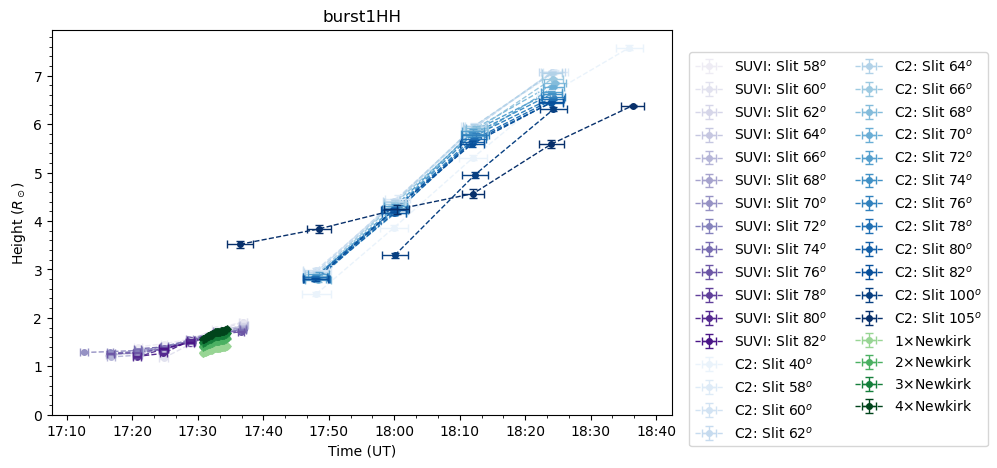

In [17]:
cmap_radio = plt.get_cmap('Greens')
colors_radio = [cmap_radio(i / 5) for i in range(1, 6)]

cmap_suvi = plt.get_cmap('Purples')
color_offset = 2
colors_suvi = [cmap_suvi((i+color_offset) / (len(suvi_filenames)+color_offset)) for i in range(len(suvi_filenames))]

cmap_c2 = plt.get_cmap('Blues')
colors_c2 = [cmap_c2(i / len(c2_click_filenames)) for i in range(1, len(c2_click_filenames)+1)]

# cmap_c3 = plt.get_cmap('Reds')
# colors_c3 = [cmap_c3(i / len(c3_click_filenames)) for i in range(1, len(c3_click_filenames)+1)]


# RADIO CURVES ...
for file in radio_filenames[:1]:
    df_radio = pd.read_csv(file)
    x = df_radio['t_means']
    
    fig = plt.figure(figsize=[8,5])
    ax = fig.add_subplot(111)

    # SUVI CURVES ...
    for i, suvifile in enumerate(suvi_filenames):
        df_suvi = pd.read_csv(suvifile)

        # rename the slit angle to be PA
        PA = int(suvifile.split('slit')[-1][1:4]) - 90
        
        ax.errorbar(df_suvi['x_mean'], df_suvi['y_mean']/rsun_suvi,
                    xerr=df_suvi['x_err'], yerr=df_suvi['y_err']/rsun_suvi,
                    markersize=4, linewidth=1,
                    fmt='o--', capsize=3, capthick=1, barsabove=True, color=colors_suvi[i],
                    ecolor=colors_suvi[i], label=f"SUVI: Slit {PA}$^o$")
    
    # LASCO C2 CURVES ...
    for i, c2file in enumerate(c2_click_filenames):
        df_c2 = pd.read_csv(c2file)
        
        # rename the slit angle to be PA
        PA = int(c2file.split('slit')[-1][1:4]) - 90
        
        ax.errorbar(df_c2['x_mean'], df_c2['y_mean']/rsun_lasco_c2,
                    xerr=df_c2['x_err'], yerr=df_c2['y_err']/rsun_lasco_c2,
                    markersize=4, linewidth=1,
                    fmt='o--', capsize=3, capthick=1, barsabove=True, color=colors_c2[i],
                    ecolor=colors_c2[i], label=f"C2: Slit {PA}$^o$")

    # LASCO C3 CURVES ...
    try:
        for i, c3file in enumerate(c3_click_filenames):
            df_c3 = pd.read_csv(c3file)
            ax.errorbar(df_c3['x_mean'], df_c3['y_mean']/rsun_lasco_c3,
                        xerr=df_c3['x_err'], yerr=df_c3['y_err']/rsun_lasco_c3,
                        markersize=4, linewidth=1,
                        fmt='o--', capsize=3, capthick=1, barsabove=True, color=colors_c3[i],
                        ecolor=colors_c3[i], label=f"C3: Slit {c3file.split('slit')[-1][1:4]}$^o$")
    except:
        pass

    # RADIO CURVES ...
    for i in range(1, 5):
        y = df_radio[f'h{i}_means']
        ax.errorbar(x, y, xerr=df_radio['t_standard_errors'], yerr=df_radio[f'h{i}_standard_errors'],
                    markersize=4, linewidth=1,
                    fmt='o--', capsize=3, capthick=1, barsabove=True, color=colors_radio[i],
                    ecolor=colors_radio[i], label=f'{i}$\\times$Newkirk')

    ax.set_title(f"{file.split('/')[-1].split('_')[0]}")
    ax.legend(loc='lower right', bbox_to_anchor=(1.52,-0.1), ncol=2)
    ax.xaxis_date()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax.xaxis.set_minor_locator(AutoMinorLocator(n=3))
    ax.yaxis.set_minor_locator(AutoMinorLocator(n=5))
    ax.set_ylim(bottom=0)
    ax.set_xlabel('Time (UT)')
    ax.set_ylabel(r'Height ($R_\odot$)')
    # fig.savefig(f"/home/mnedal/repos/dias_work/jplots/all_clicking/suvi_c2_c3_radio/suvi_c2_c3_{file.split('/')[-1].split('_')[0]}.pdf", format='pdf', bbox_inches='tight')
    plt.show()

In [18]:
c2_paths_filtered = [
    path for path in c2_click_filenames 
    if 148 <= int(path.split('_')[-1].split('.')[0]) <= 172
]
print(*c2_paths_filtered, sep='\n')

/home/mnedal/data/jplots/lasco_C2/clicking/jmap_LASCO_C2_20240514_slit_148.csv
/home/mnedal/data/jplots/lasco_C2/clicking/jmap_LASCO_C2_20240514_slit_150.csv
/home/mnedal/data/jplots/lasco_C2/clicking/jmap_LASCO_C2_20240514_slit_152.csv
/home/mnedal/data/jplots/lasco_C2/clicking/jmap_LASCO_C2_20240514_slit_154.csv
/home/mnedal/data/jplots/lasco_C2/clicking/jmap_LASCO_C2_20240514_slit_156.csv
/home/mnedal/data/jplots/lasco_C2/clicking/jmap_LASCO_C2_20240514_slit_158.csv
/home/mnedal/data/jplots/lasco_C2/clicking/jmap_LASCO_C2_20240514_slit_160.csv
/home/mnedal/data/jplots/lasco_C2/clicking/jmap_LASCO_C2_20240514_slit_162.csv
/home/mnedal/data/jplots/lasco_C2/clicking/jmap_LASCO_C2_20240514_slit_164.csv
/home/mnedal/data/jplots/lasco_C2/clicking/jmap_LASCO_C2_20240514_slit_166.csv
/home/mnedal/data/jplots/lasco_C2/clicking/jmap_LASCO_C2_20240514_slit_168.csv
/home/mnedal/data/jplots/lasco_C2/clicking/jmap_LASCO_C2_20240514_slit_170.csv
/home/mnedal/data/jplots/lasco_C2/clicking/jmap_LASC

In [19]:
last_SRB = [f for f in updated_radio_filenames if os.path.basename(f).startswith('hs_4')]
last_SRB

['/home/mnedal/data/ccuddy/updated/hs_4F.csv',
 '/home/mnedal/data/ccuddy/updated/hs_4H.csv']

In [22]:
# cmap_radio = plt.get_cmap('Greens')
# colors_radio = [cmap_radio(i / 5) for i in range(1, 6)]

# cmap_suvi = plt.get_cmap('Purples')
# color_offset = 2
# colors_suvi = [cmap_suvi((i+color_offset) / (len(suvi_filenames)+color_offset)) for i in range(len(suvi_filenames))]

# cmap_c2 = plt.get_cmap('Blues')
# colors_c2 = [cmap_c2(i / len(c2_paths_filtered)) for i in range(1, len(c2_paths_filtered)+1)]


# fig = plt.figure(figsize=[12,4])

# # RADIO CURVES ...
# for k, file in enumerate(sorted(last_SRB), start=1):
#     df_radio = pd.read_csv(file)
#     df_radio.drop('Modified Newkirk', axis=1, inplace=True)
#     x = df_radio['Time']
    
#     ax = fig.add_subplot(1, 2, k)
#     # SUVI CURVES ...
#     for i, suvifile in enumerate(suvi_filenames):
#         df_suvi = pd.read_csv(suvifile)

#         # rename the slit angle to be PA
#         PA = int(suvifile.split('slit')[-1][1:4]) - 90
        
#         ax.errorbar(df_suvi['x_mean'], df_suvi['y_mean']/rsun_suvi,
#                     xerr=df_suvi['x_err'], yerr=df_suvi['y_err']/rsun_suvi,
#                     markersize=3, linewidth=1,
#                     fmt='o--', capsize=3, capthick=1, barsabove=True, color=colors_suvi[i],
#                     ecolor=colors_suvi[i], label=rf"SUVI: {PA}$^o$")
#     # RADIO CURVES ...
#     for j, col in enumerate(df_radio.columns[2:]):
#         y = df_radio[col]
#         if col == 'Leblanc':
#             curve_color = 'gold'
#         elif col == 'Mann':
#             curve_color = 'gray'
#         elif col == 'Saito':
#             curve_color = 'crimson'
#         elif col == 'Allen':
#             curve_color = 'dodgerblue'
#         else:
#             curve_color = colors_radio[j]
#         ax.errorbar(x, y, xerr=0, yerr=0,
#                     markersize=3, linewidth=1,
#                     fmt='^--', capsize=3, capthick=1, barsabove=True, color=curve_color,
#                     ecolor=curve_color, label=col)
#     lane_name = f"{file.split('/')[-1].split('_')[1].split('.')[0]}"
#     ax.text(0.03, 0.955, lane_name, transform=ax.transAxes,
#             fontsize=14, verticalalignment='top', bbox=dict(facecolor='white', edgecolor='black'))
    
#     # LASCO C2 CURVES ...
#     for i, c2file in enumerate(c2_paths_filtered):
#         df_c2 = pd.read_csv(c2file)
        
#         # rename the slit angle to be PA
#         PA = int(c2file.split('slit')[-1][1:4]) - 90
        
#         ax.errorbar(df_c2['x_mean'], df_c2['y_mean']/rsun_lasco_c2,
#                     xerr=df_c2['x_err'], yerr=df_c2['y_err']/rsun_lasco_c2,
#                     markersize=4, linewidth=1,
#                     fmt='o--', capsize=3, capthick=1, barsabove=True, color=colors_c2[i],
#                     ecolor=colors_c2[i], label=f"C2: Slit {PA}$^o$")

#     ax.xaxis_date()
#     ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
#     ax.xaxis.set_minor_locator(AutoMinorLocator(n=2))
#     ax.yaxis.set_minor_locator(AutoMinorLocator(n=5))
#     ax.set_ylim(bottom=1)
#     ax.set_xlabel('Time (UT)')
#     # Remove y-axis labels for the second column
#     if k % 2 == 0:
#         ax.set_ylabel('')
#     else:
#         ax.set_ylabel(r'Height ($R_\odot$)')

# # Add a single legend box for the whole figure
# handles, labels = ax.get_legend_handles_labels()
# fig.legend(handles, labels, loc='upper center',
#            bbox_to_anchor=(0.5, 1.3),
#            bbox_transform=fig.transFigure,
#            ncols=7,
#            mode='expand'
# )
# fig.tight_layout()
# # fig.savefig('/home/mnedal/data/last_SRB.pdf', format='pdf', bbox_inches='tight')
# plt.show()

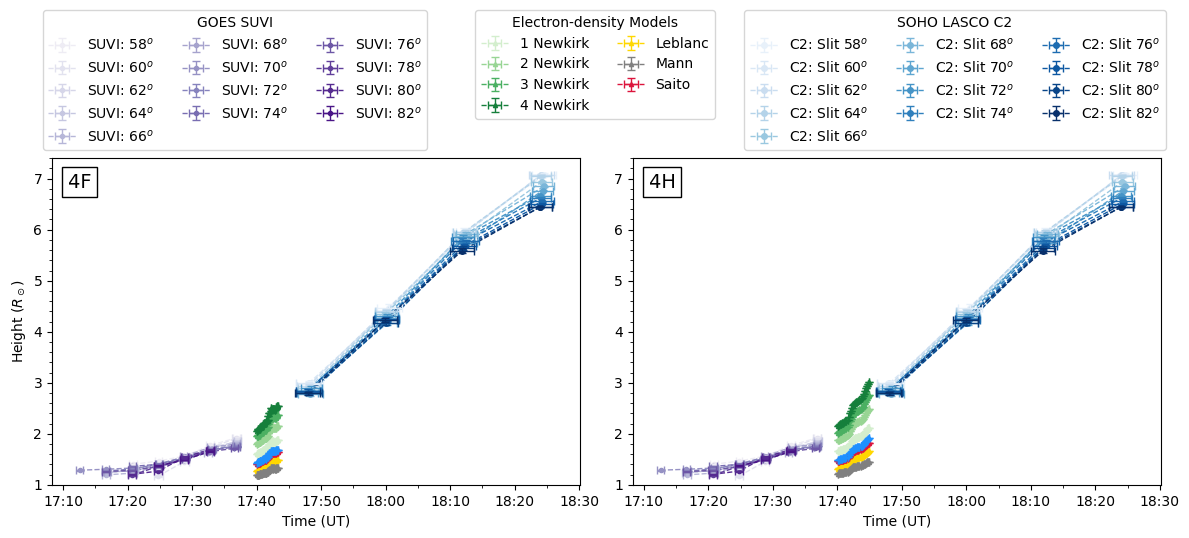

In [30]:
cmap_radio = plt.get_cmap('Greens')
colors_radio = [cmap_radio(i / 5) for i in range(1, 6)]

cmap_suvi = plt.get_cmap('Purples')
color_offset = 2
colors_suvi = [cmap_suvi((i+color_offset) / (len(suvi_filenames)+color_offset)) for i in range(len(suvi_filenames))]

cmap_c2 = plt.get_cmap('Blues')
colors_c2 = [cmap_c2(i / len(c2_paths_filtered)) for i in range(1, len(c2_paths_filtered)+1)]


fig = plt.figure(figsize=[12,4])

# RADIO CURVES ...
for k, file in enumerate(sorted(last_SRB), start=1):
    df_radio = pd.read_csv(file)
    df_radio.drop('Modified Newkirk', axis=1, inplace=True)
    x = df_radio['Time']
    
    ax = fig.add_subplot(1, 2, k)
    # SUVI CURVES ...
    for i, suvifile in enumerate(suvi_filenames):
        df_suvi = pd.read_csv(suvifile)

        # rename the slit angle to be PA
        PA = int(suvifile.split('slit')[-1][1:4]) - 90
        
        ax.errorbar(df_suvi['x_mean'], df_suvi['y_mean']/rsun_suvi,
                    xerr=df_suvi['x_err'], yerr=df_suvi['y_err']/rsun_suvi,
                    markersize=3, linewidth=1,
                    fmt='o--', capsize=3, capthick=1, barsabove=True, color=colors_suvi[i],
                    ecolor=colors_suvi[i], label=rf"SUVI: {PA}$^o$")
    # RADIO CURVES ...
    for j, col in enumerate(df_radio.columns[2:]):
        y = df_radio[col]
        if col == 'Leblanc':
            curve_color = 'gold'
        elif col == 'Mann':
            curve_color = 'gray'
        elif col == 'Saito':
            curve_color = 'crimson'
        elif col == 'Allen':
            curve_color = 'dodgerblue'
        else:
            curve_color = colors_radio[j]
        ax.errorbar(x, y, xerr=0, yerr=0,
                    markersize=3, linewidth=1,
                    fmt='^--', capsize=3, capthick=1, barsabove=True, color=curve_color,
                    ecolor=curve_color, label=col)
    lane_name = f"{file.split('/')[-1].split('_')[1].split('.')[0]}"
    ax.text(0.03, 0.955, lane_name, transform=ax.transAxes,
            fontsize=14, verticalalignment='top', bbox=dict(facecolor='white', edgecolor='black'))
    
    # LASCO C2 CURVES ...
    for i, c2file in enumerate(c2_paths_filtered):
        df_c2 = pd.read_csv(c2file)

        # rename the slit angle to be PA
        PA = int(c2file.split('slit')[-1][1:4]) - 90
        
        ax.errorbar(df_c2['x_mean'], df_c2['y_mean']/rsun_lasco_c2,
                    xerr=df_c2['x_err'], yerr=df_c2['y_err']/rsun_lasco_c2,
                    markersize=4, linewidth=1,
                    fmt='o--', capsize=3, capthick=1, barsabove=True, color=colors_c2[i],
                    ecolor=colors_c2[i], label=f"C2: Slit {PA}$^o$")

    ax.xaxis_date()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax.xaxis.set_minor_locator(AutoMinorLocator(n=2))
    ax.yaxis.set_minor_locator(AutoMinorLocator(n=5))
    ax.set_ylim(bottom=1)
    ax.set_xlabel('Time (UT)')
    # Remove y-axis labels for the second column
    if k % 2 == 0:
        ax.set_ylabel('')
    else:
        ax.set_ylabel(r'Height ($R_\odot$)')

# Add a single legend box for the whole figure, split into three parts ...
# Get all handles and labels
handles, labels = ax.get_legend_handles_labels()

# Split the legend into three parts: purple, green/colored, and blue
purple_handles = [handles[i] for i, label in enumerate(labels) if label.startswith('SUVI')]
purple_labels = [label for label in labels if label.startswith('SUVI')]

green_handles = [handles[i] for i, label in enumerate(labels) if 'Newkirk' in label or label in ['Leblanc', 'Mann', 'Saito']]
green_labels = [label for label in labels if 'Newkirk' in label or label in ['Leblanc', 'Mann', 'Saito']]

blue_handles = [handles[i] for i, label in enumerate(labels) if label.startswith('C2')]
blue_labels = [label for label in labels if label.startswith('C2')]

# Add the purple labels to the left
fig.legend(purple_handles, purple_labels,
           loc='upper center', bbox_to_anchor=(0.2, 1.35),
           bbox_transform=fig.transFigure, ncol=3, title='GOES SUVI')

# Add the green and colored labels to the middle
fig.legend(green_handles, green_labels,
           loc='upper center', bbox_to_anchor=(0.5, 1.35),
           bbox_transform=fig.transFigure, ncol=2, title='Electron-density Models')

# Add the blue labels to the right
fig.legend(blue_handles, blue_labels,
           loc='upper center', bbox_to_anchor=(0.8, 1.35),
           bbox_transform=fig.transFigure, ncol=3, title='SOHO LASCO C2')

# Adjust layout to leave space for legends
fig.tight_layout(rect=[0, 0, 1, 0.85])

fig.tight_layout()
fig.savefig('/home/mnedal/data/last_SRB.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [24]:
df_c2['y_mean']/rsun_lasco_c2

0    2.793039
1    4.229464
2    5.592069
3    6.447157
Name: y_mean, dtype: float64

In [26]:
df_c2['x_err']

0    0.001356
1    0.001334
2    0.001293
3    0.001259
Name: x_err, dtype: float64

In [28]:
df_c2['y_err']/rsun_lasco_c2

0    0.027012
1    0.045984
2    0.055632
3    0.006878
Name: y_err, dtype: float64

948.9823639616588

In [18]:
df_c3.head()

Unnamed: 0          time      distance   distance_km  distance_diff_km  \
0           0  19857.753933   4693.726809  3.440985e+06               NaN   
1           1  19857.762375   6160.146104  4.516022e+06      1.075036e+06   
2           2  19857.770753   7587.975417  5.562767e+06      1.046746e+06   
3           3  19857.778747   9035.099722  6.623659e+06      1.060891e+06   
4           4  19857.787253  10250.684137  7.514807e+06      8.911486e+05   

                           datetime  time_diff_s   speed_km_s  
0  2024-05-14 18:05:39.809924+00:00          NaN          NaN  
1  2024-05-14 18:17:49.192020+00:00   729.382096  1473.900139  
2  2024-05-14 18:29:53.048494+00:00   723.856474  1446.068357  
3  2024-05-14 18:41:23.751236+00:00   690.702742  1535.959093  
4  2024-05-14 18:53:38.658953+00:00   734.907717  1212.599285

In [ ]:
pd.read_csv(radio_filenames[0]).head(1)

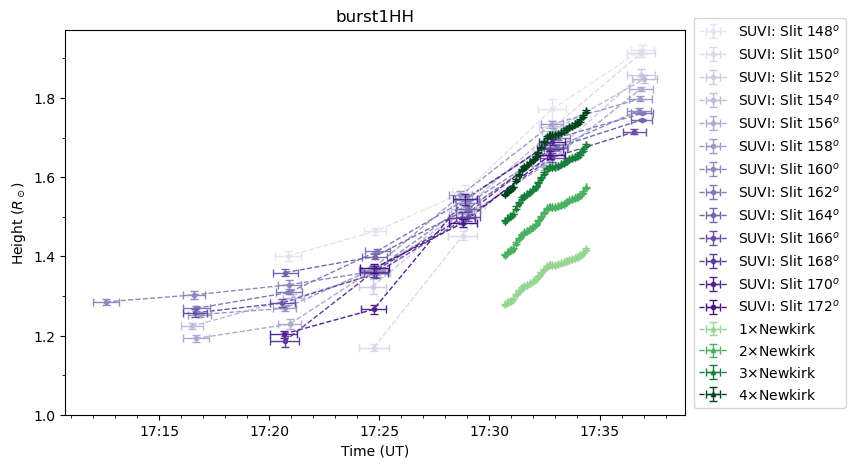

In [9]:
cmap_radio = plt.get_cmap('Greens')
colors_radio = [cmap_radio(i / 5) for i in range(1, 6)]

cmap_suvi = plt.get_cmap('Purples') # Purples, Greys
color_offset = 3
colors_suvi = [cmap_suvi((i+color_offset) / (len(suvi_filenames)+color_offset)) for i in range(len(suvi_filenames))]


# RADIO CURVES ...
for file in radio_filenames[:1]:
    df_radio = pd.read_csv(file)
    x = df_radio['t_means']
    
    fig = plt.figure(figsize=[8,5])
    ax = fig.add_subplot(111)

    # SUVI CURVES ...
    for i, suvifile in enumerate(suvi_filenames):
        df_suvi = pd.read_csv(suvifile)
        ax.errorbar(df_suvi['x_mean'], df_suvi['y_mean']/rsun_suvi,
                    xerr=df_suvi['x_err'], yerr=df_suvi['y_err']/rsun_suvi,
                    markersize=3, linewidth=1,
                    fmt='o--', capsize=3, capthick=1, barsabove=True, color=colors_suvi[i],
                    ecolor=colors_suvi[i], label=f"SUVI: Slit {suvifile.split('slit')[-1][1:4]}$^o$")

    # RADIO CURVES ...
    for i in range(1, 5):
        y = df_radio[f'h{i}_means']
        ax.errorbar(x, y, xerr=df_radio['t_standard_errors'], yerr=df_radio[f'h{i}_standard_errors'],
                    markersize=3, linewidth=1,
                    fmt='^--', capsize=3, capthick=1, barsabove=True, color=colors_radio[i],
                    ecolor=colors_radio[i], label=f'{i}$\\times$Newkirk')

    ax.set_title(f"{file.split('/')[-1].split('_')[0]}")
    ax.legend(loc='lower right', bbox_to_anchor=(1.27,0))
    ax.xaxis_date()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax.xaxis.set_minor_locator(AutoMinorLocator(n=5))
    ax.yaxis.set_minor_locator(AutoMinorLocator(n=2))
    ax.set_ylim(bottom=1)
    ax.set_xlabel('Time (UT)')
    ax.set_ylabel(r'Height ($R_\odot$)')
    # fig.savefig(f"/home/mnedal/repos/dias_work/jplots/all_clicking/suvi_radio/suvi_{file.split('/')[-1].split('_')[0]}.pdf", format='pdf', bbox_inches='tight')
    # fig.savefig(f"/home/mnedal/repos/dias_work/jplots/all_clicking/suvi_{file.split('/')[-1].split('_')[0]}.png", format='png', dpi=300, bbox_inches='tight')
    plt.show()

In [12]:
df_radio.columns[2:]

Index(['t_medians', 't_standard_errors', 'h1_means', 'h1_medians',
       'h1_standard_errors', 'h2_means', 'h2_medians', 'h2_standard_errors',
       'h3_means', 'h3_medians', 'h3_standard_errors', 'h4_means',
       'h4_medians', 'h4_standard_errors', 'f_means', 'f_medians',
       'f_standard_errors'],
      dtype='object')

In [14]:
# df1 = pd.read_csv(radio_filenames[0])['Saito']
# df2 = pd.read_csv(radio_filenames[-1])['Saito']
# df1.equals(df2)

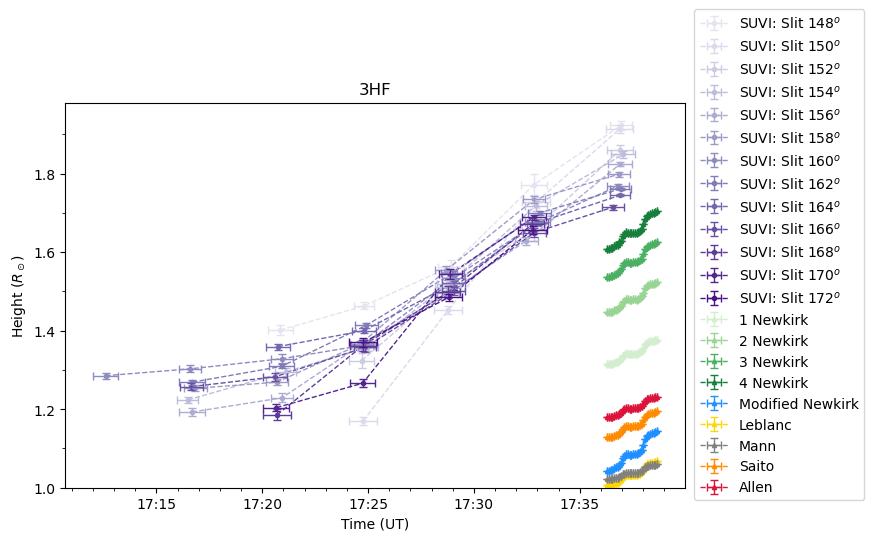

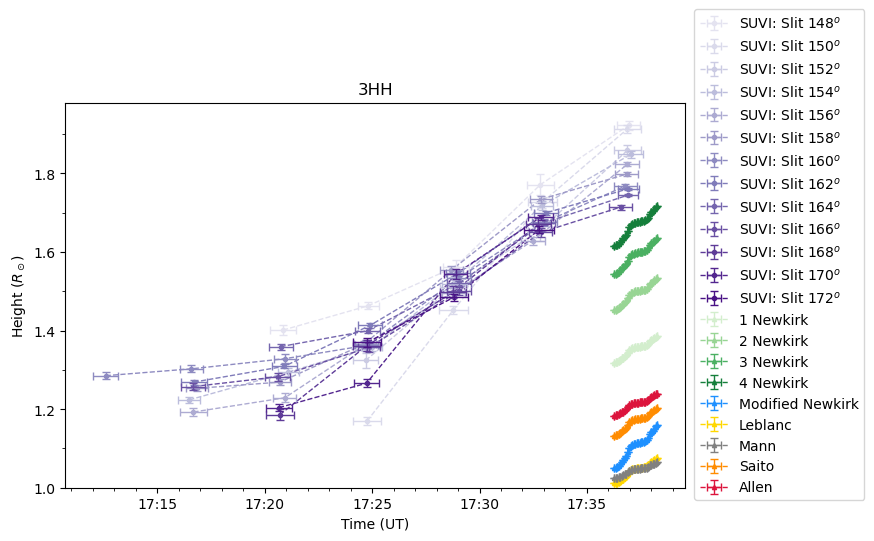

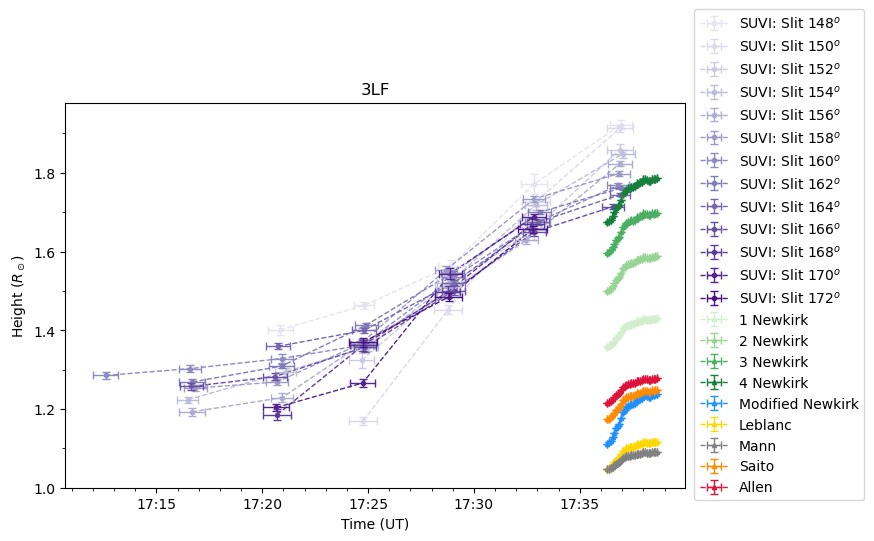

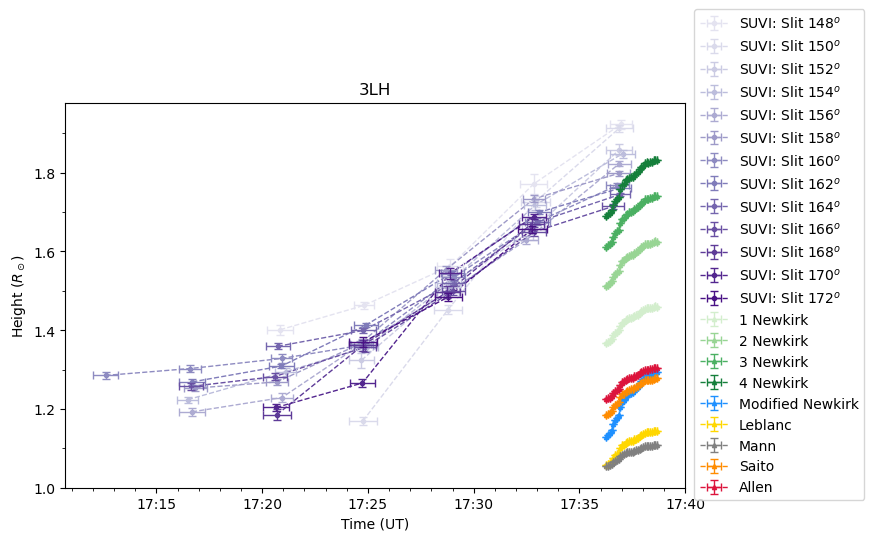

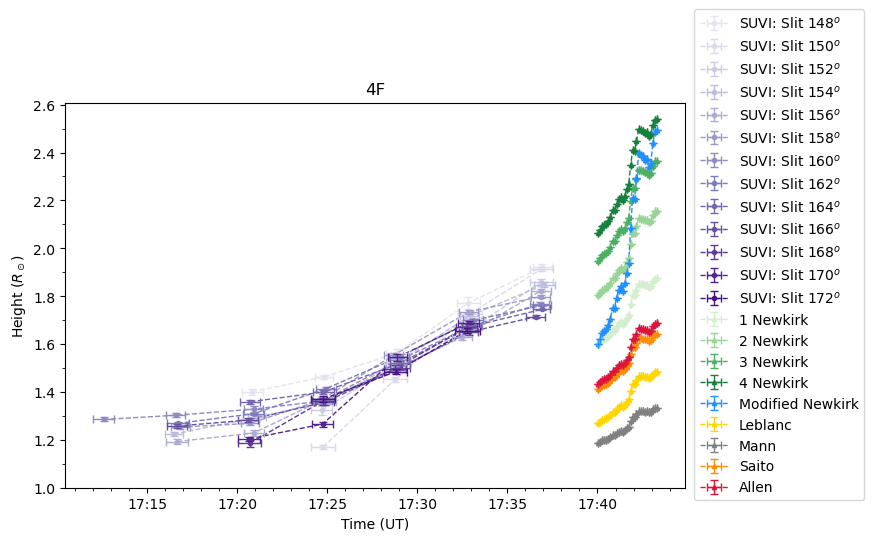

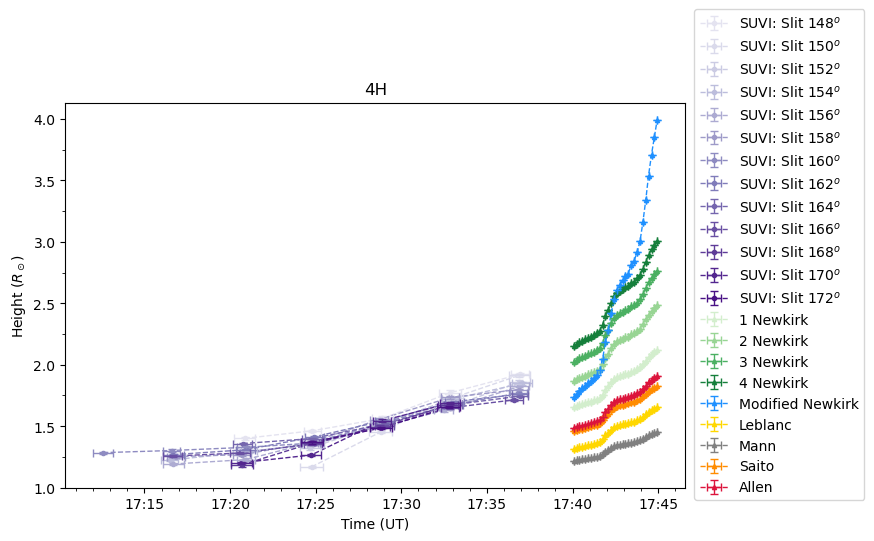

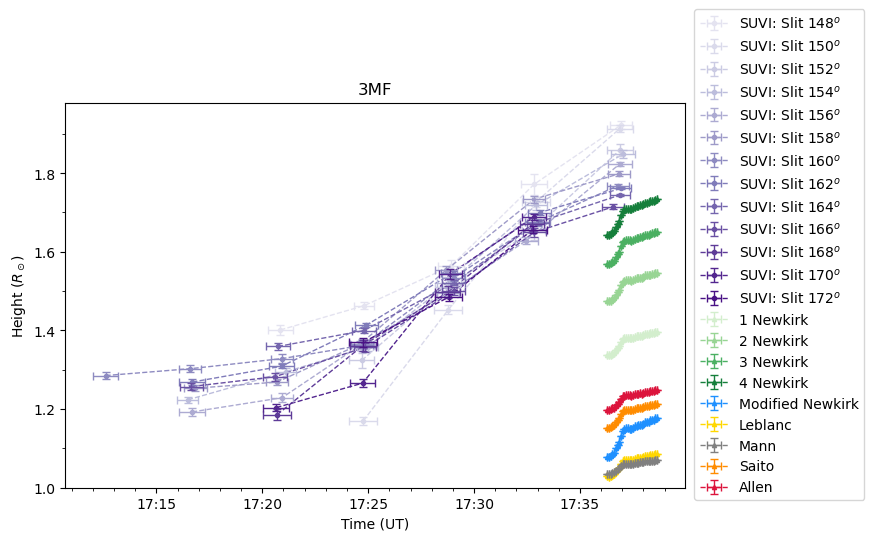

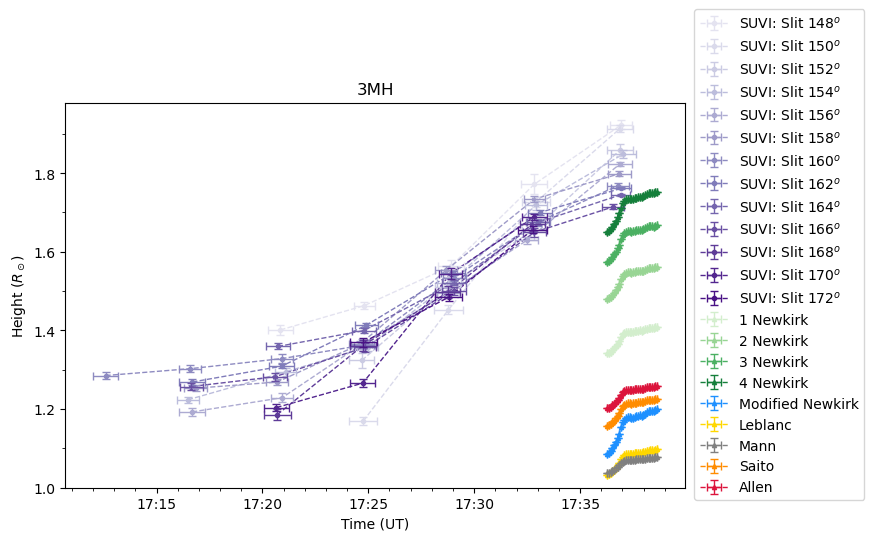

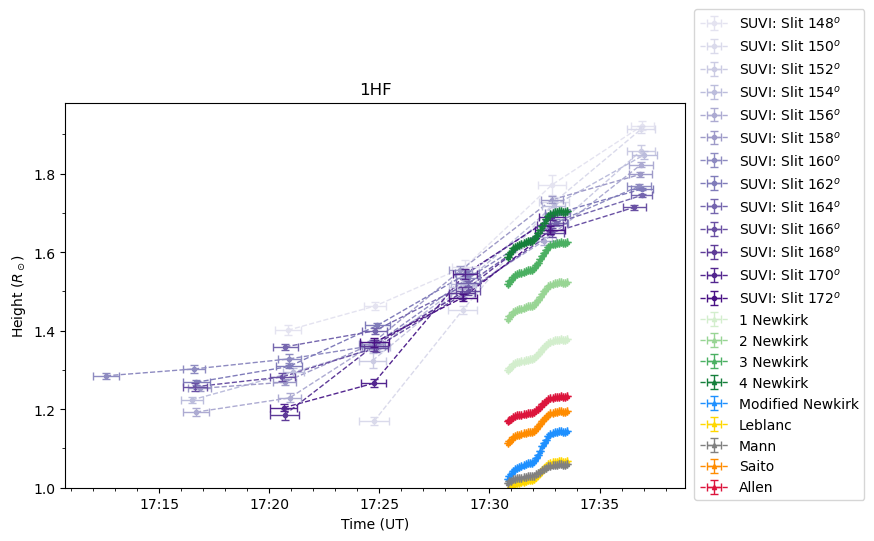

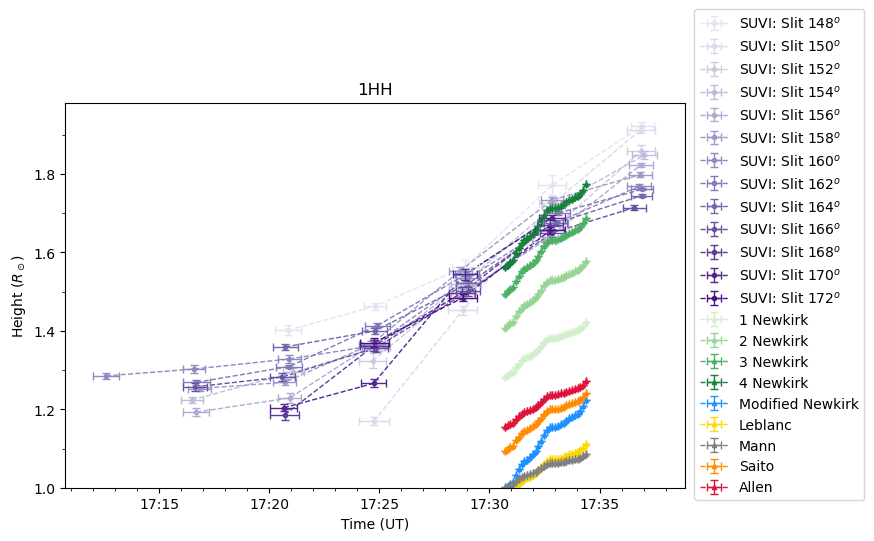

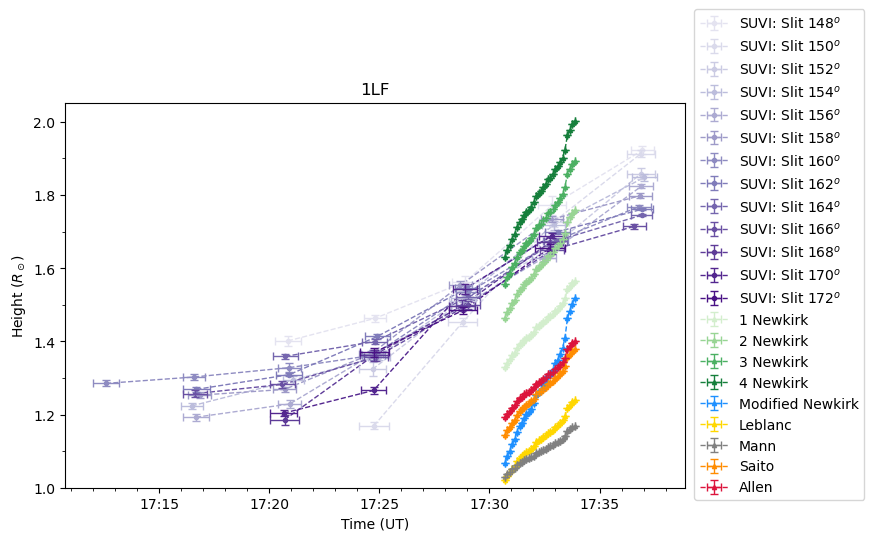

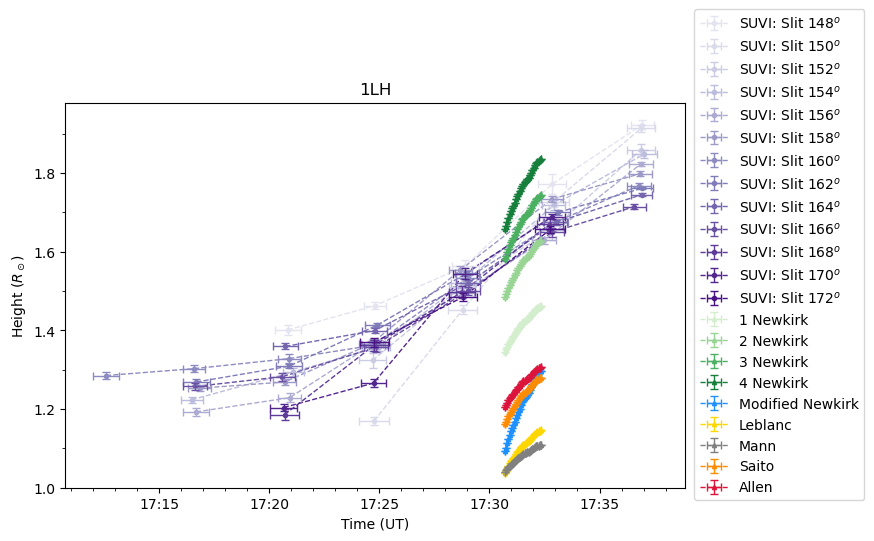

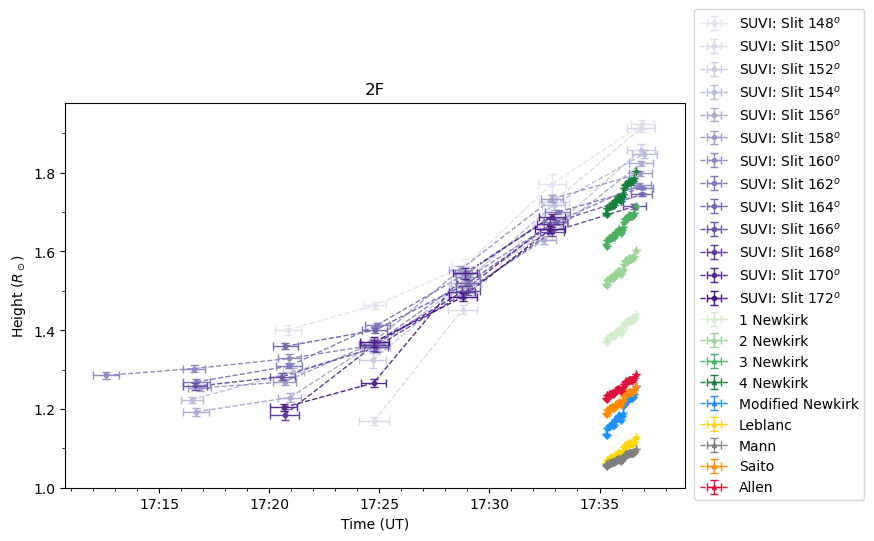

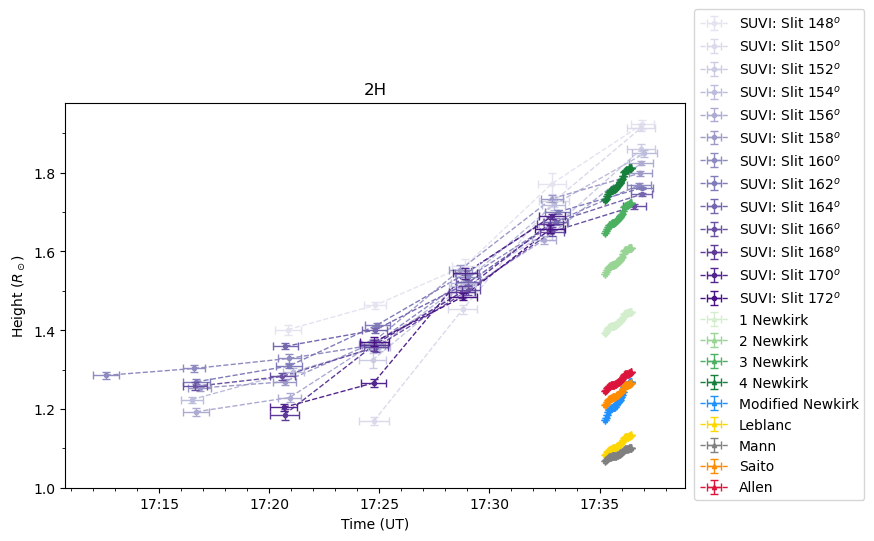

In [35]:
cmap_radio = plt.get_cmap('Greens')
colors_radio = [cmap_radio(i / 5) for i in range(1, 6)]

cmap_suvi = plt.get_cmap('Purples') # Purples, Greys
color_offset = 3
colors_suvi = [cmap_suvi((i+color_offset) / (len(suvi_filenames)+color_offset)) for i in range(len(suvi_filenames))]


# RADIO CURVES ...
for file in updated_radio_filenames:
    df_radio = pd.read_csv(file)    
    # x = df_radio['Time']
    x = df_radio['Time']
    # newkirk1 = df_radio['1 Newkirk']
    # newkirk2 = df_radio['2 Newkirk']
    # newkirk3 = df_radio['3 Newkirk']
    # newkirk4 = df_radio['4 Newkirk']
    # mod_newkirk = df_radio['Modified Newkirk']
    # leblanc = df_radio['Leblanc']
    # mann = df_radio['Mann']
    # saito = df_radio['Saito']
    # allen = df_radio['Allen']
    
    fig = plt.figure(figsize=[8,5])
    ax = fig.add_subplot(111)

    # SUVI CURVES ...
    for i, suvifile in enumerate(suvi_filenames):
        df_suvi = pd.read_csv(suvifile)
        ax.errorbar(df_suvi['x_mean'], df_suvi['y_mean']/rsun_suvi,
                    xerr=df_suvi['x_err'], yerr=df_suvi['y_err']/rsun_suvi,
                    markersize=3, linewidth=1,
                    fmt='o--', capsize=3, capthick=1, barsabove=True, color=colors_suvi[i],
                    ecolor=colors_suvi[i], label=f"SUVI: Slit {suvifile.split('slit')[-1][1:4]}$^o$")

    # RADIO CURVES ...
    for j, col in enumerate(df_radio.columns[2:]):
        y = df_radio[col]
        if col == 'Modified Newkirk':
            curve_color = 'dodgerblue'
        elif col == 'Leblanc':
            curve_color = 'gold'
        elif col == 'Mann':
            curve_color = 'gray'
        elif col == 'Saito':
            curve_color = 'darkorange'
        elif col == 'Allen':
            curve_color = 'crimson'
        else:
            curve_color = colors_radio[j]
        ax.errorbar(x, y, xerr=0, yerr=0,
                    markersize=3, linewidth=1,
                    fmt='^--', capsize=3, capthick=1, barsabove=True, color=curve_color,
                    ecolor=curve_color, label=col)

    ax.set_title(f"{file.split('/')[-1].split('_')[1].split('.')[0]}")
    ax.legend(loc='lower right', bbox_to_anchor=(1.3,-0.05))
    ax.xaxis_date()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax.xaxis.set_minor_locator(AutoMinorLocator(n=5))
    ax.yaxis.set_minor_locator(AutoMinorLocator(n=2))
    ax.set_ylim(bottom=1)
    ax.set_xlabel('Time (UT)')
    ax.set_ylabel(r'Height ($R_\odot$)')
    # output_filename = f"/home/mnedal/repos/dias_work/jplots/all_clicking/suvi_radio/suvi_{file.split('/')[-1].split('_')[1].split('.')[0]}"
    # fig.savefig(f'{output_filename}.pdf', format='pdf', bbox_inches='tight')
    # fig.savefig(f'{output_filename}.png', format='png', dpi=300, bbox_inches='tight')
    plt.show()

In [53]:
for k, file in enumerate(sorted(updated_radio_filenames)[:6], start=1):
    print(k, file)

1 /home/mnedal/data/ccuddy/updated/hs_1HF.csv
2 /home/mnedal/data/ccuddy/updated/hs_1HH.csv
3 /home/mnedal/data/ccuddy/updated/hs_1LF.csv
4 /home/mnedal/data/ccuddy/updated/hs_1LH.csv
5 /home/mnedal/data/ccuddy/updated/hs_2F.csv
6 /home/mnedal/data/ccuddy/updated/hs_2H.csv


In [42]:
df_radio = pd.read_csv(updated_radio_filenames[0])
df_radio.head()

Unnamed: 0          Time  1 Newkirk  2 Newkirk  3 Newkirk  4 Newkirk  \
0           0  19857.733540   1.314228   1.446718   1.537378   1.608915   
1           1  19857.733598   1.314288   1.446789   1.537459   1.609003   
2           2  19857.733651   1.314838   1.447457   1.538213   1.609829   
3           3  19857.733709   1.315483   1.448239   1.539096   1.610796   
4           4  19857.733766   1.318136   1.451454   1.542728   1.614774   

   Modified Newkirk   Leblanc      Mann     Saito     Allen  
0          1.042978  1.006336  1.021339  1.127980  1.180067  
1          1.043070  1.006395  1.021375  1.128043  1.180115  
2          1.043920  1.006937  1.021710  1.128632  1.180558  
3          1.044917  1.007572  1.022102  1.129321  1.181078  
4          1.049026  1.010180  1.023714  1.132151  1.183217

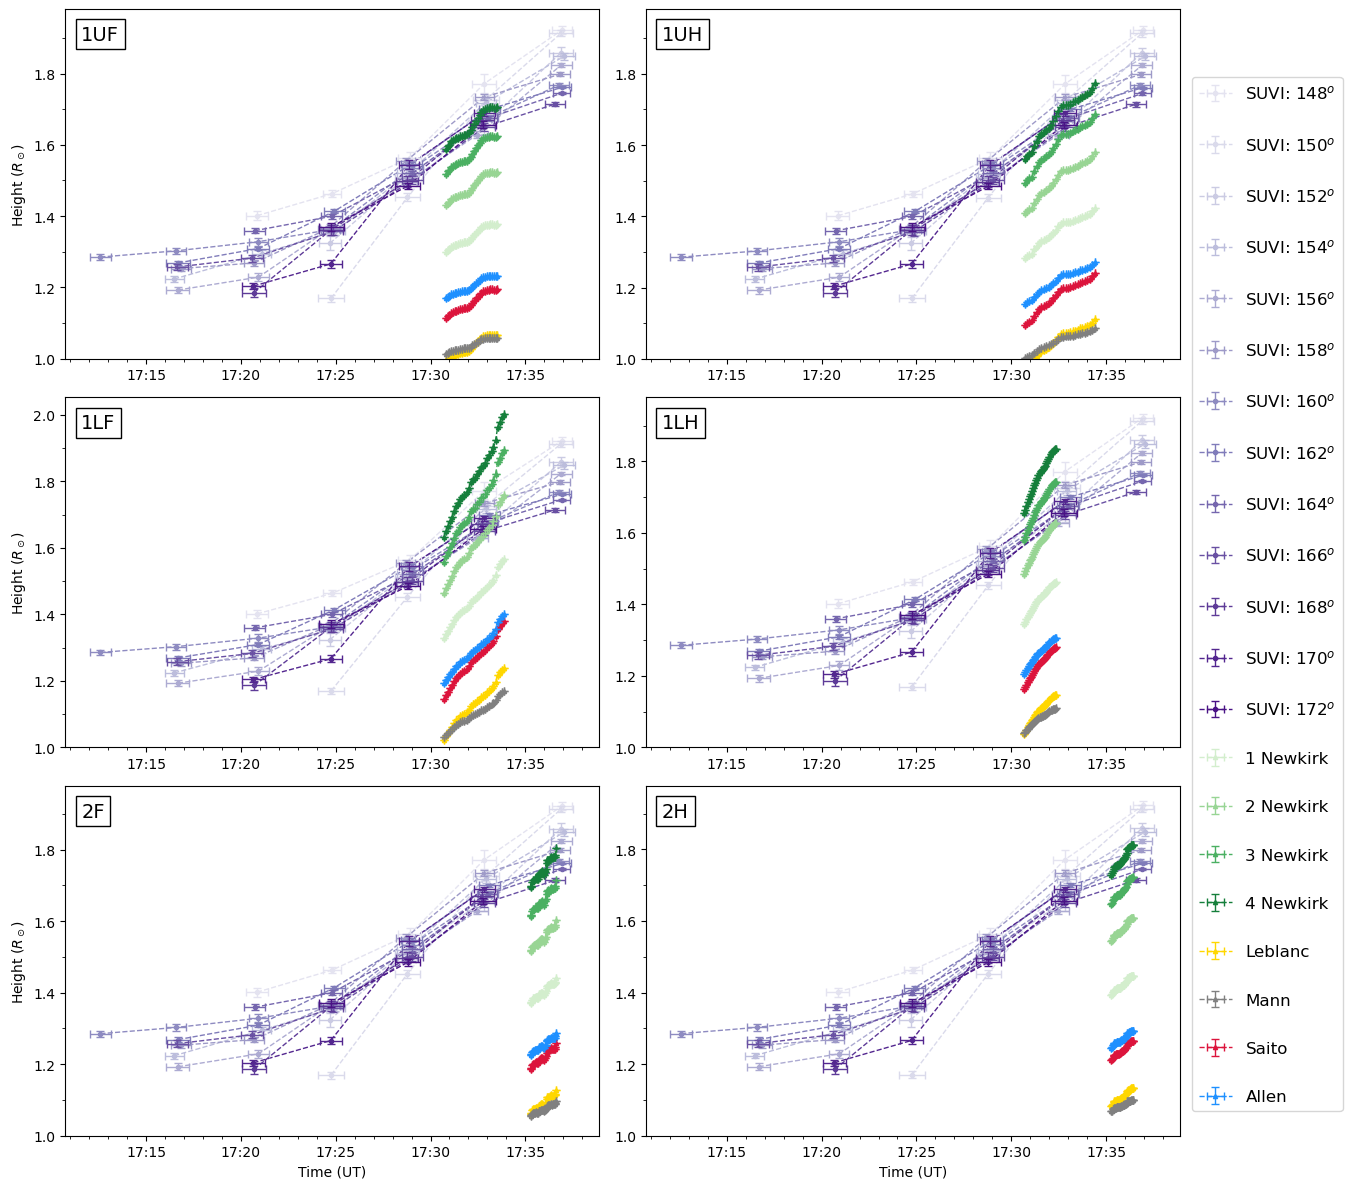

In [14]:
cmap_radio = plt.get_cmap('Greens')
colors_radio = [cmap_radio(i / 5) for i in range(1, 6)]

cmap_suvi = plt.get_cmap('Purples') # Purples, Greys
color_offset = 3
colors_suvi = [cmap_suvi((i+color_offset) / (len(suvi_filenames)+color_offset)) for i in range(len(suvi_filenames))]

fig = plt.figure(figsize=[12,12])

# RADIO CURVES ...
for k, file in enumerate(sorted(updated_radio_filenames)[:6], start=1):
    df_radio = pd.read_csv(file)
    df_radio.drop('Modified Newkirk', axis=1, inplace=True)
    x = df_radio['Time']
    
    ax = fig.add_subplot(3, 2, k)
    # SUVI CURVES ...
    for i, suvifile in enumerate(suvi_filenames):
        df_suvi = pd.read_csv(suvifile)
        ax.errorbar(df_suvi['x_mean'], df_suvi['y_mean']/rsun_suvi,
                    xerr=df_suvi['x_err'], yerr=df_suvi['y_err']/rsun_suvi,
                    markersize=3, linewidth=1,
                    fmt='o--', capsize=3, capthick=1, barsabove=True, color=colors_suvi[i],
                    ecolor=colors_suvi[i], label=rf"SUVI: {suvifile.split('slit')[-1][1:4]}$^o$")
    # RADIO CURVES ...
    for j, col in enumerate(df_radio.columns[2:]):
        y = df_radio[col]
        if col == 'Leblanc':
            curve_color = 'gold'
        elif col == 'Mann':
            curve_color = 'gray'
        elif col == 'Saito':
            curve_color = 'crimson'
        elif col == 'Allen':
            curve_color = 'dodgerblue'
        else:
            curve_color = colors_radio[j]
        ax.errorbar(x, y, xerr=0, yerr=0,
                    markersize=3, linewidth=1,
                    fmt='^--', capsize=3, capthick=1, barsabove=True, color=curve_color,
                    ecolor=curve_color, label=col)
    lane_name = f"{file.split('/')[-1].split('_')[1].split('.')[0]}"
    # ax.set_title(lane_name)
    if lane_name == '1HF':
        lane_name = '1UF'
    elif lane_name == '1HH':
        lane_name = '1UH'
    elif lane_name == '3HF':
        lane_name = '3UF'
    elif lane_name == '3HH':
        lane_name = '3UH'
    ax.text(0.03, 0.955, lane_name, transform=ax.transAxes,
            fontsize=14, verticalalignment='top', bbox=dict(facecolor='white', edgecolor='black'))
    ax.xaxis_date()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax.xaxis.set_minor_locator(AutoMinorLocator(n=5))
    ax.yaxis.set_minor_locator(AutoMinorLocator(n=2))
    ax.set_ylim(bottom=1)
    # ax.set_xlim(left=pd.Timestamp('2024-05-14 17:20'), right=pd.Timestamp('2024-05-14 18:05'))
    
    # Remove y-axis labels for the second column
    if k % 2 == 0:
        ax.set_ylabel('')
    else:
        ax.set_ylabel(r'Height ($R_\odot$)')
    
    # Remove x-axis labels except for the last two panels
    if k <= 4:
        ax.set_xlabel('')
    else:
        ax.set_xlabel('Time (UT)')

# # Add a single legend box for the whole figure
# handles, labels = ax.get_legend_handles_labels()
# fig.legend(handles, labels, loc='center right',
#            bbox_to_anchor=(1.13, 0.5),
#            bbox_transform=fig.transFigure,
#            # borderpad=10,
#            # labelspacing=2,
#            # handlelength=15,
#            # handleheight=15,
#            # handletextpad=15,
#            fontsize='large'
# )
# Add a single legend box for the whole figure
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='center right',
           bbox_to_anchor=(1.13, 0.5),
           bbox_transform=fig.transFigure,
           labelspacing=2,
           fontsize='large'
)
fig.tight_layout()
# fig.savefig('/home/mnedal/data/Jplots_profiles1.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [105]:
file.split('/')[-1].split('_')[1].split('.')[0][1:].startswith('H'):
title = file.split('/')[-1].split('_')[1].split('.')[0][1:]

False

In [2]:
for k, file in enumerate(sorted(updated_radio_filenames)[6:], start=1):
    print(k, file)

NameError: name 'updated_radio_filenames' is not defined

In [32]:
cmap_radio = plt.get_cmap('Greens')
colors_radio = [cmap_radio(i / 5) for i in range(1, 6)]

cmap_suvi = plt.get_cmap('Purples') # Purples, Greys
color_offset = 3
colors_suvi = [cmap_suvi((i+color_offset) / (len(suvi_filenames)+color_offset)) for i in range(len(suvi_filenames))]

# cmap_c2 = plt.get_cmap('Blues')
# colors_c2 = [cmap_c2(i / len(c2_click_filenames)) for i in range(1, len(c2_click_filenames)+1)]



fig = plt.figure(figsize=[12,15])

# # LASCO C2 CURVES ...
# for i, c2file in enumerate(c2_click_filenames):
#     df_c2 = pd.read_csv(c2file)
#     ax.errorbar(df_c2['x_mean'], df_c2['y_mean']/rsun_lasco_c2,
#                 xerr=df_c2['x_err'], yerr=df_c2['y_err']/rsun_lasco_c2,
#                 markersize=3, linewidth=1,
#                 fmt='s--', capsize=3, capthick=1, barsabove=True, color=colors_c2[i],
#                 ecolor=colors_c2[i], label=f"C2: Slit {c2file.split('slit')[-1][1:4]}$^o$")
# RADIO CURVES ...
# for k, file in enumerate(sorted(updated_radio_filenames)[6:], start=1):
for k, file in enumerate(sorted(updated_radio_filenames)):
    df_radio = pd.read_csv(file)
    df_radio.drop('Modified Newkirk', axis=1, inplace=True)
    x = df_radio['Time']
    
    ax = fig.add_subplot(4, 2, k)
    # SUVI CURVES ...
    for i, suvifile in enumerate(suvi_filenames):
        df_suvi = pd.read_csv(suvifile)
        ax.errorbar(df_suvi['x_mean'], df_suvi['y_mean']/rsun_suvi,
                    xerr=df_suvi['x_err'], yerr=df_suvi['y_err']/rsun_suvi,
                    markersize=3, linewidth=1,
                    fmt='o--', capsize=3, capthick=1, barsabove=True, color=colors_suvi[i],
                    ecolor=colors_suvi[i], label=rf"SUVI: {suvifile.split('slit')[-1][1:4]}$^o$")
    # RADIO CURVES ...
    for j, col in enumerate(df_radio.columns[2:]):
        y = df_radio[col]
        if col == 'Leblanc':
            curve_color = 'gold'
        elif col == 'Mann':
            curve_color = 'gray'
        elif col == 'Saito':
            curve_color = 'crimson'
        elif col == 'Allen':
            curve_color = 'dodgerblue'
        else:
            curve_color = colors_radio[j]
        ax.errorbar(x, y, xerr=0, yerr=0,
                    markersize=3, linewidth=1,
                    fmt='^--', capsize=3, capthick=1, barsabove=True, color=curve_color,
                    ecolor=curve_color, label=col)
    lane_name = f"{file.split('/')[-1].split('_')[1].split('.')[0]}"
    if lane_name == '1HF':
        lane_name = '1UF'
    elif lane_name == '1HH':
        lane_name = '1UH'
    elif lane_name == '3HF':
        lane_name = '3UF'
    elif lane_name == '3HH':
        lane_name = '3UH'
    ax.text(0.03, 0.955, lane_name, transform=ax.transAxes,
            fontsize=14, verticalalignment='top', bbox=dict(facecolor='white', edgecolor='black'))
    ax.xaxis_date()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax.xaxis.set_minor_locator(AutoMinorLocator(n=5))
    ax.yaxis.set_minor_locator(AutoMinorLocator(n=2))
    ax.set_ylim(bottom=1)
    # Remove y-axis labels for the second column
    if k % 2 == 0:
        ax.set_ylabel('')
    else:
        ax.set_ylabel(r'Height ($R_\odot$)')
    # Remove x-axis labels except for the last two panels
    if k <= 6:
        ax.set_xlabel('')
    else:
        ax.set_xlabel('Time (UT)')
# Add a single legend box for the whole figure
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='center right',
           bbox_to_anchor=(1.13, 0.5),
           bbox_transform=fig.transFigure,
           labelspacing=2,
           fontsize='large'
)
fig.tight_layout()
# fig.savefig('/home/mnedal/data/Jplots_profiles2.pdf', format='pdf', bbox_inches='tight')
plt.show()

ValueError: num must be an integer with 1 <= num <= 8, not 0

<Figure size 1200x1500 with 0 Axes>

In [36]:
updated_radio_filenames

['/home/mnedal/data/ccuddy/updated/hs_3HF.csv',
 '/home/mnedal/data/ccuddy/updated/hs_3HH.csv',
 '/home/mnedal/data/ccuddy/updated/hs_3LF.csv',
 '/home/mnedal/data/ccuddy/updated/hs_3LH.csv',
 '/home/mnedal/data/ccuddy/updated/hs_4F.csv',
 '/home/mnedal/data/ccuddy/updated/hs_4H.csv',
 '/home/mnedal/data/ccuddy/updated/hs_3MF.csv',
 '/home/mnedal/data/ccuddy/updated/hs_3MH.csv',
 '/home/mnedal/data/ccuddy/updated/hs_1HF.csv',
 '/home/mnedal/data/ccuddy/updated/hs_1HH.csv',
 '/home/mnedal/data/ccuddy/updated/hs_1LF.csv',
 '/home/mnedal/data/ccuddy/updated/hs_1LH.csv',
 '/home/mnedal/data/ccuddy/updated/hs_2F.csv',
 '/home/mnedal/data/ccuddy/updated/hs_2H.csv']

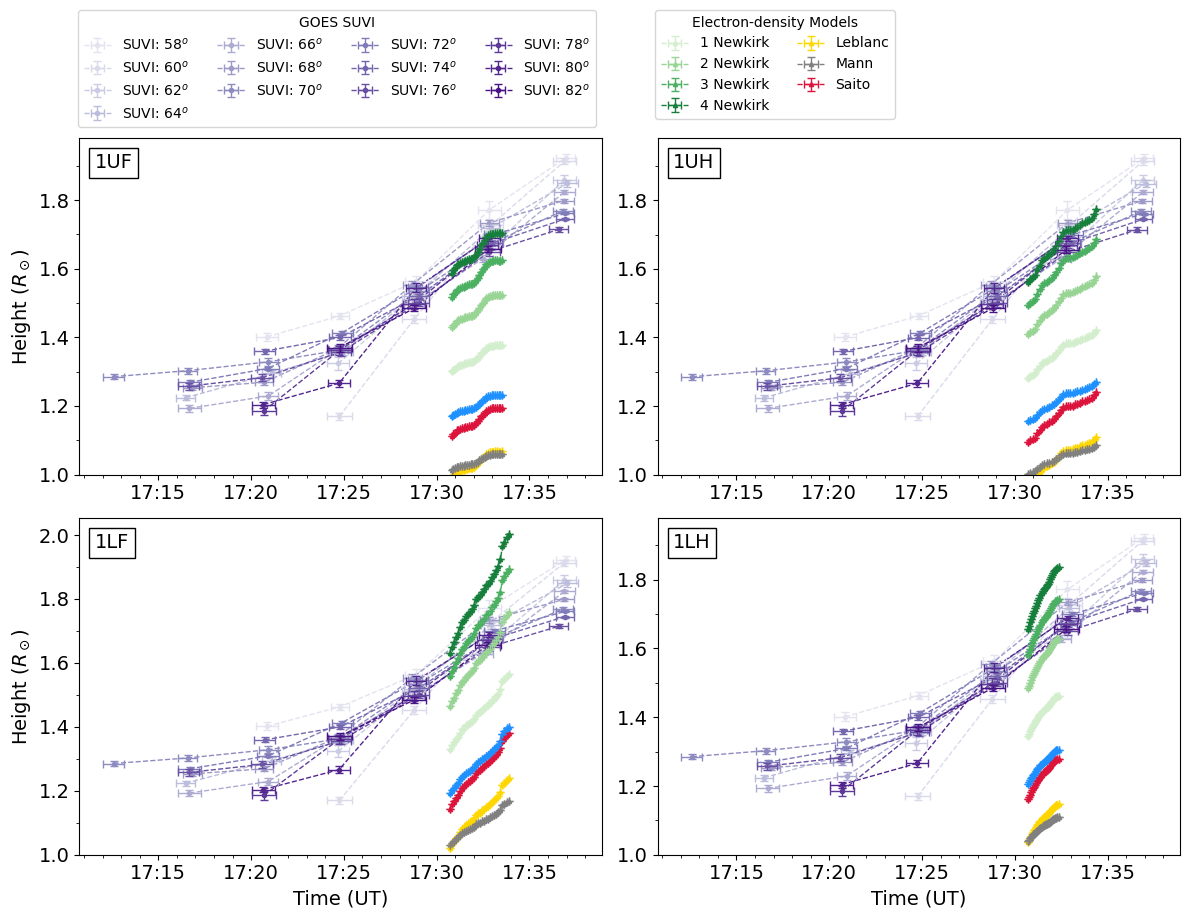

In [73]:
burst_num = 1

cmap_radio = plt.get_cmap('Greens')
colors_radio = [cmap_radio(i / 5) for i in range(1, 6)]

cmap_suvi = plt.get_cmap('Purples') # Purples, Greys
color_offset = 3
colors_suvi = [cmap_suvi((i+color_offset) / (len(suvi_filenames)+color_offset)) for i in range(len(suvi_filenames))]


# Extract filenames that start with '1'
first_SRB = [f for f in updated_radio_filenames if os.path.basename(f).startswith(f'hs_{burst_num}')]

fig = plt.figure(figsize=[12,8])

# RADIO CURVES ...
for k, file in enumerate(sorted(first_SRB), start=1):
    df_radio = pd.read_csv(file)
    df_radio.drop('Modified Newkirk', axis=1, inplace=True)
    x = df_radio['Time']
    
    ax = fig.add_subplot(2, 2, k)
    # SUVI CURVES ...
    for i, suvifile in enumerate(suvi_filenames):
        df_suvi = pd.read_csv(suvifile)

        # rename the slit angle to be PA
        PA = int(suvifile.split('slit')[-1][1:4]) - 90
        
        ax.errorbar(df_suvi['x_mean'], df_suvi['y_mean']/rsun_suvi,
                    xerr=df_suvi['x_err'], yerr=df_suvi['y_err']/rsun_suvi,
                    markersize=3, linewidth=1,
                    fmt='o--', capsize=3, capthick=1, barsabove=True, color=colors_suvi[i],
                    ecolor=colors_suvi[i], label=rf"SUVI: {PA}$^o$")
    # RADIO CURVES ...
    for j, col in enumerate(df_radio.columns[2:]):
        y = df_radio[col]
        if col == 'Leblanc':
            curve_color = 'gold'
        elif col == 'Mann':
            curve_color = 'gray'
        elif col == 'Saito':
            curve_color = 'crimson'
        elif col == 'Allen':
            curve_color = 'dodgerblue'
        else:
            curve_color = colors_radio[j]
        ax.errorbar(x, y, xerr=0, yerr=0,
                    markersize=3, linewidth=1,
                    fmt='^--', capsize=3, capthick=1, barsabove=True, color=curve_color,
                    ecolor=curve_color, label=col)
    lane_name = f"{file.split('/')[-1].split('_')[1].split('.')[0]}"
    if lane_name == '1HF':
        lane_name = '1UF'
    elif lane_name == '1HH':
        lane_name = '1UH'
    ax.text(0.03, 0.955, lane_name, transform=ax.transAxes,
            fontsize=14, verticalalignment='top', bbox=dict(facecolor='white', edgecolor='black'))
    ax.xaxis_date()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax.xaxis.set_minor_locator(AutoMinorLocator(n=5))
    ax.yaxis.set_minor_locator(AutoMinorLocator(n=2))
    ax.set_ylim(bottom=1)
    ax.set_xlabel('Time (UT)')
    
    # Remove y-axis labels for the second column
    if k % 2 == 0:
        ax.set_ylabel('')
    else:
        ax.set_ylabel(r'Height ($R_\odot$)')
    
    # Remove x-axis labels except for the last two panels
    if burst_num == 1:
        if k <= 2:
            ax.set_xlabel('')
        else:
            ax.set_xlabel('Time (UT)')

# # Add a single legend box for the whole figure
# handles, labels = ax.get_legend_handles_labels()
# fig.legend(handles, labels, loc='center right',
#            bbox_to_anchor=(1.13, 0.525),
#            bbox_transform=fig.transFigure,
#            labelspacing=1,
#            fontsize='large')

# Add a single legend box for the whole figure, split into three parts ...
# Get all handles and labels
handles, labels = ax.get_legend_handles_labels()

# Split the legend into three parts: purple, green/colored, and blue
purple_handles = [handles[i] for i, label in enumerate(labels) if label.startswith('SUVI')]
purple_labels = [label for label in labels if label.startswith('SUVI')]

green_handles = [handles[i] for i, label in enumerate(labels) if 'Newkirk' in label or label in ['Leblanc', 'Mann', 'Saito']]
green_labels = [label for label in labels if 'Newkirk' in label or label in ['Leblanc', 'Mann', 'Saito']]

# Add the purple labels to the left
fig.legend(purple_handles, purple_labels,
           loc='upper center', bbox_to_anchor=(0.285, 1.15),
           bbox_transform=fig.transFigure, ncol=4, title='GOES SUVI')

# Add the green and colored labels to the middle
fig.legend(green_handles, green_labels,
           loc='upper center', bbox_to_anchor=(0.65, 1.15),
           bbox_transform=fig.transFigure, ncol=2, title='Electron-density Models')

fig.tight_layout()
fig.savefig(f'/home/mnedal/data/SRB_{burst_num}.pdf', format='pdf', bbox_inches='tight')
plt.show()

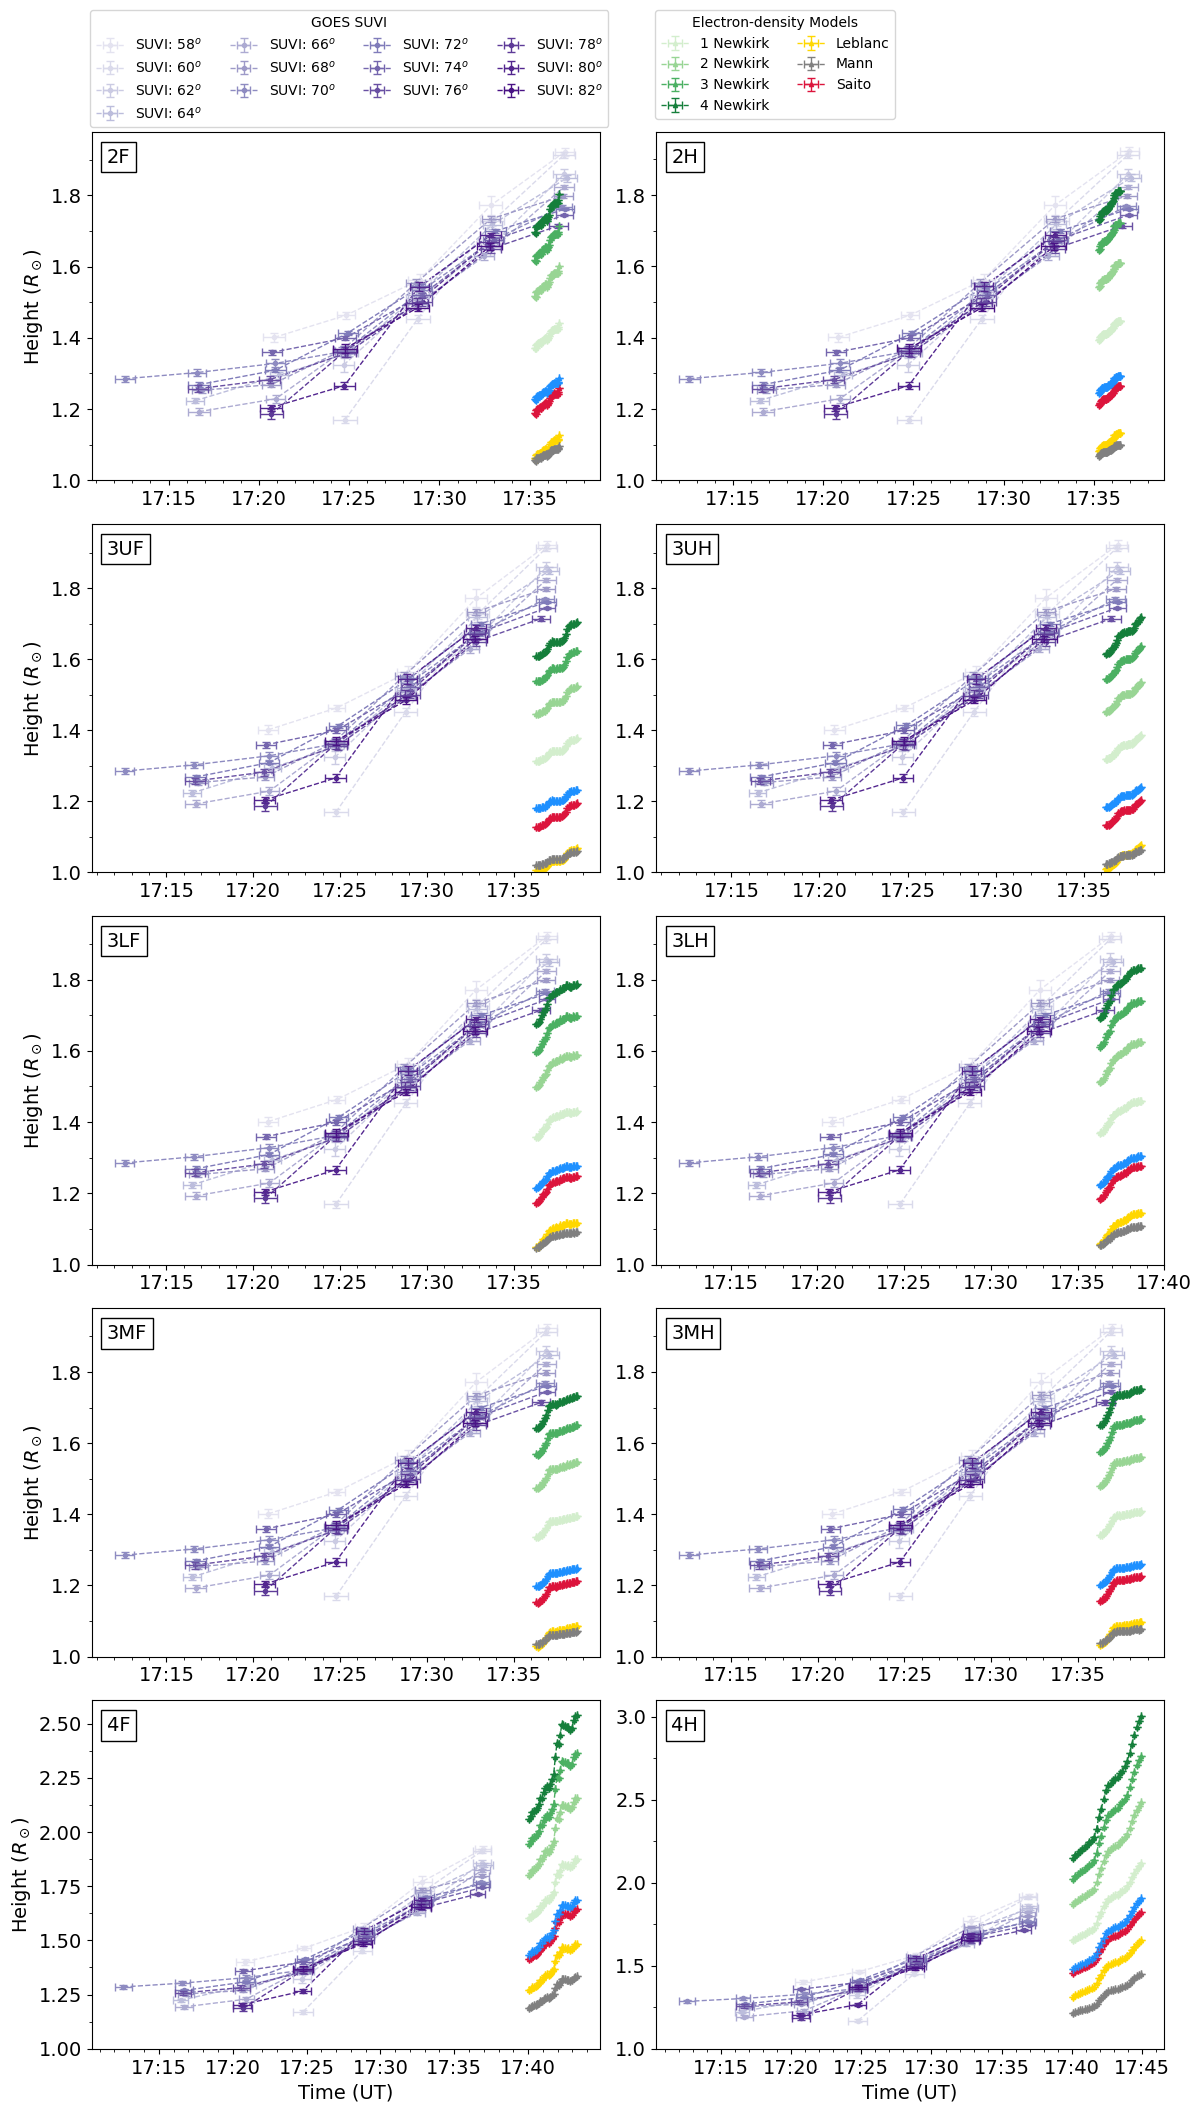

In [85]:
remaining_SRB = [f for f in updated_radio_filenames if not os.path.basename(f).startswith('hs_1')]

fig = plt.figure(figsize=[12,20])

# RADIO CURVES ...
for k, file in enumerate(sorted(remaining_SRB), start=1):
    df_radio = pd.read_csv(file)
    df_radio.drop('Modified Newkirk', axis=1, inplace=True)
    x = df_radio['Time']
    
    ax = fig.add_subplot(5, 2, k)
    # SUVI CURVES ...
    for i, suvifile in enumerate(suvi_filenames):
        df_suvi = pd.read_csv(suvifile)

        # rename the slit angle to be PA
        PA = int(suvifile.split('slit')[-1][1:4]) - 90
        
        ax.errorbar(df_suvi['x_mean'], df_suvi['y_mean']/rsun_suvi,
                    xerr=df_suvi['x_err'], yerr=df_suvi['y_err']/rsun_suvi,
                    markersize=3, linewidth=1,
                    fmt='o--', capsize=3, capthick=1, barsabove=True, color=colors_suvi[i],
                    ecolor=colors_suvi[i], label=rf"SUVI: {PA}$^o$")
    # RADIO CURVES ...
    for j, col in enumerate(df_radio.columns[2:]):
        y = df_radio[col]
        if col == 'Leblanc':
            curve_color = 'gold'
        elif col == 'Mann':
            curve_color = 'gray'
        elif col == 'Saito':
            curve_color = 'crimson'
        elif col == 'Allen':
            curve_color = 'dodgerblue'
        else:
            curve_color = colors_radio[j]
        ax.errorbar(x, y, xerr=0, yerr=0,
                    markersize=3, linewidth=1,
                    fmt='^--', capsize=3, capthick=1, barsabove=True, color=curve_color,
                    ecolor=curve_color, label=col)
    lane_name = f"{file.split('/')[-1].split('_')[1].split('.')[0]}"
    if lane_name == '3HF':
        lane_name = '3UF'
    elif lane_name == '3HH':
        lane_name = '3UH'
    
    ax.text(0.03, 0.955, lane_name, transform=ax.transAxes,
            fontsize=14, verticalalignment='top', bbox=dict(facecolor='white', edgecolor='black'))
    ax.xaxis_date()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax.xaxis.set_minor_locator(AutoMinorLocator(n=5))
    ax.yaxis.set_minor_locator(AutoMinorLocator(n=2))
    ax.set_ylim(bottom=1)    
    # Remove y-axis labels for the second column
    if k % 2 == 0:
        ax.set_ylabel('')
    else:
        ax.set_ylabel(r'Height ($R_\odot$)')
    
    # Remove x-axis labels except for the last two panels
    if k <= 8:
        ax.set_xlabel('')
    else:
        ax.set_xlabel('Time (UT)')

# Add a single legend box for the whole figure, split into three parts ...
# Get all handles and labels
handles, labels = ax.get_legend_handles_labels()

# Split the legend into three parts: purple, green/colored, and blue
purple_handles = [handles[i] for i, label in enumerate(labels) if label.startswith('SUVI')]
purple_labels = [label for label in labels if label.startswith('SUVI')]

green_handles = [handles[i] for i, label in enumerate(labels) if 'Newkirk' in label or label in ['Leblanc', 'Mann', 'Saito']]
green_labels = [label for label in labels if 'Newkirk' in label or label in ['Leblanc', 'Mann', 'Saito']]

# Add the purple labels to the left
fig.legend(purple_handles, purple_labels,
           loc='upper center', bbox_to_anchor=(0.285, 1.057),
           bbox_transform=fig.transFigure, ncol=4, title='GOES SUVI')

# Add the green and colored labels to the middle
fig.legend(green_handles, green_labels,
           loc='upper center', bbox_to_anchor=(0.64, 1.057),
           bbox_transform=fig.transFigure, ncol=2, title='Electron-density Models')

fig.tight_layout()
fig.savefig('/home/mnedal/data/remaining_SRBs.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [113]:
updated_radio_filenames

['/home/mnedal/data/ccuddy/updated/hs_3HF.csv',
 '/home/mnedal/data/ccuddy/updated/hs_3HH.csv',
 '/home/mnedal/data/ccuddy/updated/hs_3LF.csv',
 '/home/mnedal/data/ccuddy/updated/hs_3LH.csv',
 '/home/mnedal/data/ccuddy/updated/hs_4F.csv',
 '/home/mnedal/data/ccuddy/updated/hs_4H.csv',
 '/home/mnedal/data/ccuddy/updated/hs_3MF.csv',
 '/home/mnedal/data/ccuddy/updated/hs_3MH.csv',
 '/home/mnedal/data/ccuddy/updated/hs_1HF.csv',
 '/home/mnedal/data/ccuddy/updated/hs_1HH.csv',
 '/home/mnedal/data/ccuddy/updated/hs_1LF.csv',
 '/home/mnedal/data/ccuddy/updated/hs_1LH.csv',
 '/home/mnedal/data/ccuddy/updated/hs_2F.csv',
 '/home/mnedal/data/ccuddy/updated/hs_2H.csv']

In [117]:
# Radio emission heights
radio_heights = []
for k, file in enumerate(sorted(updated_radio_filenames)):
    df_radio = pd.read_csv(file)
    # store the heights to find out max and min
    radio_heights.append(df_radio['4 Newkirk'].values)

print(f'Min-Max heights of type II radio emission via 4x Newkirk: {np.min(radio_heights):.2f} - {np.max(radio_heights):.2f} Rsun')

Min-Max heights of type II radio emission via 4x Newkirk: 1.56 - 3.01 Rsun


In [118]:
df_radio.head()

Unnamed: 0          Time  1 Newkirk  2 Newkirk  3 Newkirk  4 Newkirk  \
0           0  19857.736162   1.654056   1.869538   2.023760   2.149573   
1           1  19857.736272   1.664064   1.882333   2.038762   2.166506   
2           2  19857.736386   1.672618   1.893286   2.051617   2.181028   
3           3  19857.736502   1.679459   1.902055   2.061919   2.192674   
4           4  19857.736619   1.687187   1.911974   2.073580   2.205866   

   Modified Newkirk   Leblanc      Mann     Saito     Allen  
0          1.736999  1.313065  1.216966  1.459127  1.481971  
1          1.764304  1.321288  1.222412  1.467968  1.491270  
2          1.788064  1.328282  1.227054  1.475486  1.499219  
3          1.807349  1.333852  1.230756  1.481473  1.505576  
4          1.829448  1.340121  1.234930  1.488210  1.512756

In [119]:
# LASCO C2 heights
c2_heights = []
for i, c2file in enumerate(c2_paths_filtered):
    df_c2 = pd.read_csv(c2file)
    # rename the slit angle to be PA
    PA = int(c2file.split('slit')[-1][1:4]) - 90
    t = df_c2['x_mean'].mean()
    terr = df_c2['x_err'].mean()
    h = df_c2['y_mean'].mean()/rsun_lasco_c2
    herr = df_c2['y_err'].mean()/rsun_lasco_c2
    # store the heights to find out max and min
    c2_heights.append(df_c2['y_mean'].values/rsun_lasco_c2)
    # print(f'Slit: {PA} deg. \n t = {t:.2f} ± {terr:.3f} \n h = {h:.2f} ± {herr:.3f}')
    # print(30*'-')

print(f'Min-Max heights of EUV wave in LASCO C2: {np.min(c2_heights):.2f} - {np.max(c2_heights):.2f} Rsun')

Min-Max heights of EUV wave in LASCO C2: 2.78 - 7.08 Rsun


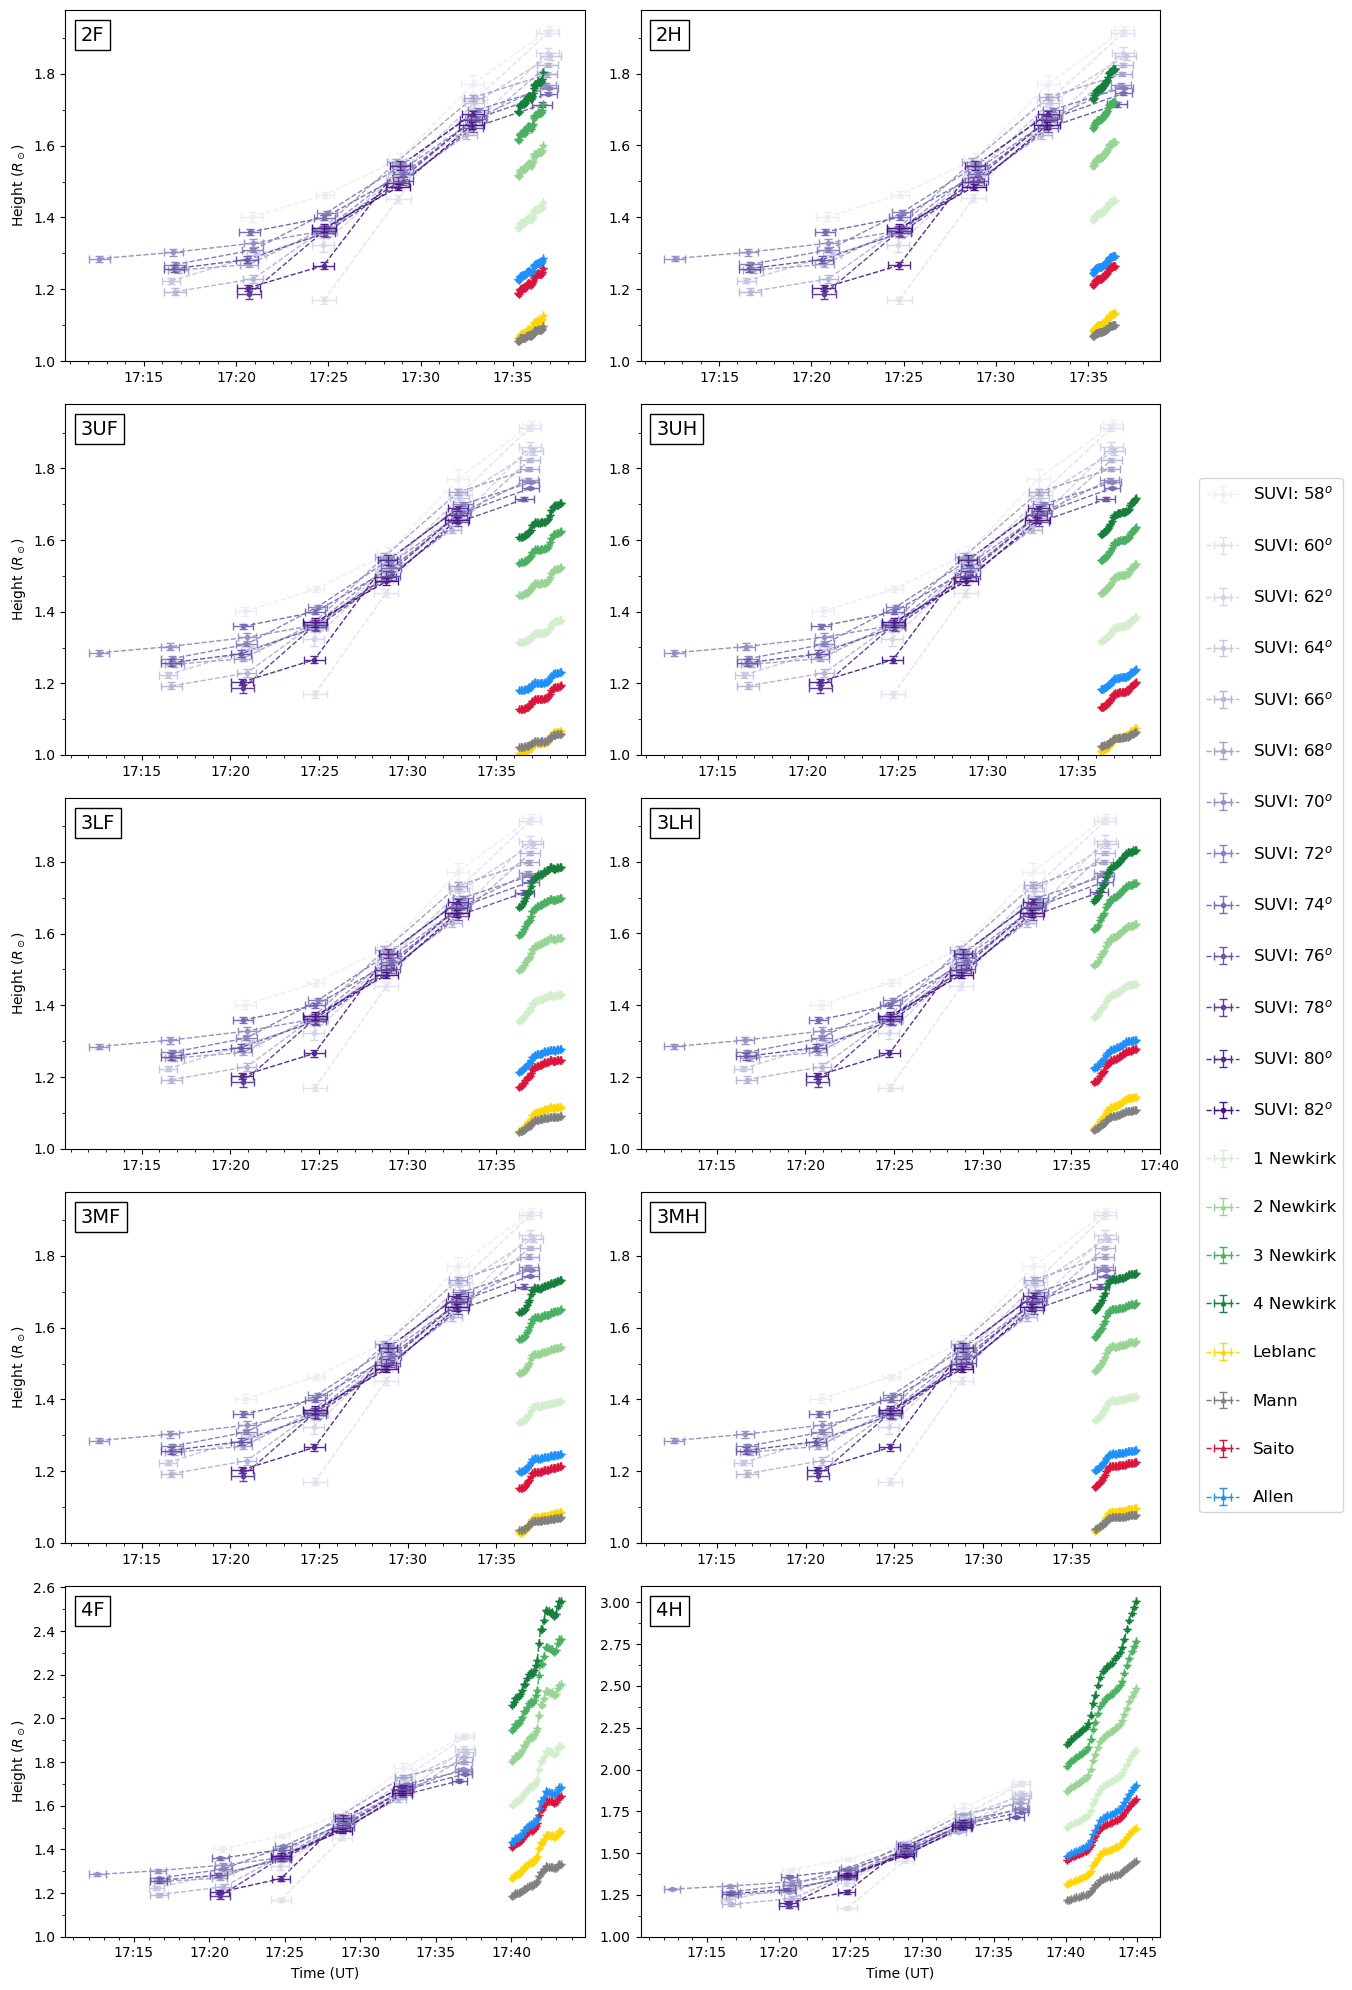

In [29]:
remaining_SRB = [f for f in updated_radio_filenames if not os.path.basename(f).startswith('hs_1')]

fig = plt.figure(figsize=[12,20])

# RADIO CURVES ...
for k, file in enumerate(sorted(remaining_SRB), start=1):
    df_radio = pd.read_csv(file)
    df_radio.drop('Modified Newkirk', axis=1, inplace=True)
    x = df_radio['Time']
    
    ax = fig.add_subplot(5, 2, k)
    # SUVI CURVES ...
    for i, suvifile in enumerate(suvi_filenames):
        df_suvi = pd.read_csv(suvifile)

        # rename the slit angle to be PA
        PA = int(suvifile.split('slit')[-1][1:4]) - 90
        
        ax.errorbar(df_suvi['x_mean'], df_suvi['y_mean']/rsun_suvi,
                    xerr=df_suvi['x_err'], yerr=df_suvi['y_err']/rsun_suvi,
                    markersize=3, linewidth=1,
                    fmt='o--', capsize=3, capthick=1, barsabove=True, color=colors_suvi[i],
                    ecolor=colors_suvi[i], label=rf"SUVI: {PA}$^o$")
    # RADIO CURVES ...
    for j, col in enumerate(df_radio.columns[2:]):
        y = df_radio[col]
        if col == 'Leblanc':
            curve_color = 'gold'
        elif col == 'Mann':
            curve_color = 'gray'
        elif col == 'Saito':
            curve_color = 'crimson'
        elif col == 'Allen':
            curve_color = 'dodgerblue'
        else:
            curve_color = colors_radio[j]
        ax.errorbar(x, y, xerr=0, yerr=0,
                    markersize=3, linewidth=1,
                    fmt='^--', capsize=3, capthick=1, barsabove=True, color=curve_color,
                    ecolor=curve_color, label=col)
    lane_name = f"{file.split('/')[-1].split('_')[1].split('.')[0]}"
    if lane_name == '3HF':
        lane_name = '3UF'
    elif lane_name == '3HH':
        lane_name = '3UH'
    ax.text(0.03, 0.955, lane_name, transform=ax.transAxes,
            fontsize=14, verticalalignment='top', bbox=dict(facecolor='white', edgecolor='black'))
    ax.xaxis_date()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax.xaxis.set_minor_locator(AutoMinorLocator(n=5))
    ax.yaxis.set_minor_locator(AutoMinorLocator(n=2))
    ax.set_ylim(bottom=1)    
    # Remove y-axis labels for the second column
    if k % 2 == 0:
        ax.set_ylabel('')
    else:
        ax.set_ylabel(r'Height ($R_\odot$)')
    
    # Remove x-axis labels except for the last two panels
    if k <= 8:
        ax.set_xlabel('')
    else:
        ax.set_xlabel('Time (UT)')

# Add a single legend box for the whole figure
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='center right',
           bbox_to_anchor=(1.13, 0.5),
           bbox_transform=fig.transFigure,
           labelspacing=2,
           fontsize='large')

fig.tight_layout()
fig.savefig('/home/mnedal/data/remaining_SRBs.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [45]:
cmap_c2 = plt.get_cmap('Blues')
colors_c2 = [cmap_c2(i / len(c2_click_filenames)) for i in range(1, len(c2_click_filenames)+1)]
    
fig = plt.figure(figsize=[8,5])
ax = fig.add_subplot(111)

# LASCO C2 CURVES ...
for i, c2file in enumerate(c2_click_filenames):
    df_c2 = pd.read_csv(c2file)
    ax.errorbar(df_c2['x_mean'], df_c2['y_mean']/rsun_lasco_c2,
                xerr=df_c2['x_err'], yerr=df_c2['y_err']/rsun_lasco_c2,
                markersize=3, linewidth=1,
                fmt='s--', capsize=3, capthick=1, barsabove=True, color=colors_c2[i],
                ecolor=colors_c2[i], label=f"C2: Slit {c2file.split('slit')[-1][1:4]}$^o$")

ax.set_xlabel('Time (UT)')
ax.set_ylabel(r'Height ($R_\odot$)')
ax.legend(loc='lower right', ncol=2, bbox_to_anchor=(1.51,-0.03))
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_minor_locator(AutoMinorLocator(n=5))
ax.yaxis.set_minor_locator(AutoMinorLocator(n=5))
ax.set_ylim(bottom=1, top=5)
ax.set_xlim(left=pd.Timestamp('2024-05-14 17:20'), right=pd.Timestamp('2024-05-14 18:05'))
plt.show()

NameError: name 'c2_click_filenames' is not defined

In [24]:
print(len(colors_radio), *colors_radio, sep='\n')

5
(0.8274509803921569, 0.9325490196078431, 0.8031372549019608, 1.0)
(0.596078431372549, 0.8345098039215686, 0.5788235294117646, 1.0)
(0.2949019607843137, 0.6901960784313725, 0.38431372549019605, 1.0)
(0.0823529411764706, 0.49803921568627446, 0.23137254901960783, 1.0)
(0.0, 0.26666666666666666, 0.10588235294117647, 1.0)


In [23]:
print(len(radio_filenames), *radio_filenames, sep='\n')

14
/home/mnedal/data/ccuddy/burst1HH_stats.csv
/home/mnedal/data/ccuddy/burst2F_stats.csv
/home/mnedal/data/ccuddy/burst3HH_stats.csv
/home/mnedal/data/ccuddy/burst3MF_stats.csv
/home/mnedal/data/ccuddy/burst3HF_stats.csv
/home/mnedal/data/ccuddy/burst3MH_stats.csv
/home/mnedal/data/ccuddy/burst2H_stats.csv
/home/mnedal/data/ccuddy/burst1HF_stats.csv
/home/mnedal/data/ccuddy/burst1LH_stats.csv
/home/mnedal/data/ccuddy/burst3LH_stats.csv
/home/mnedal/data/ccuddy/burst4H_stats.csv
/home/mnedal/data/ccuddy/burst3LF_stats.csv
/home/mnedal/data/ccuddy/burst4F_stats.csv
/home/mnedal/data/ccuddy/burst1LF_stats.csv


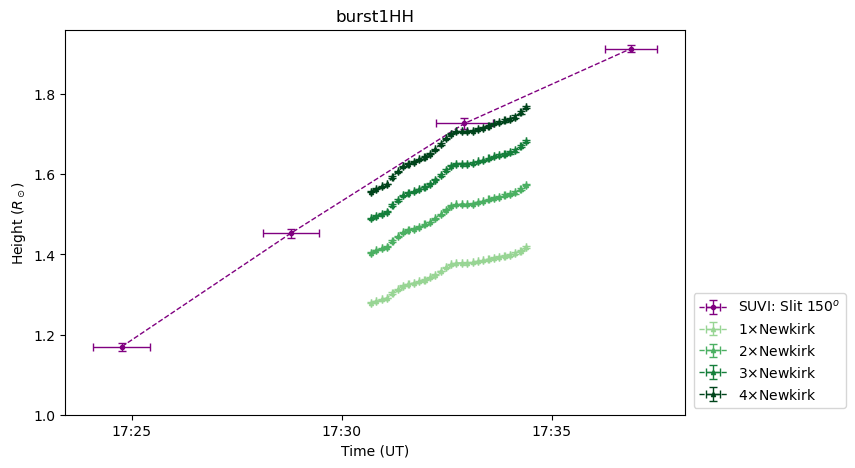

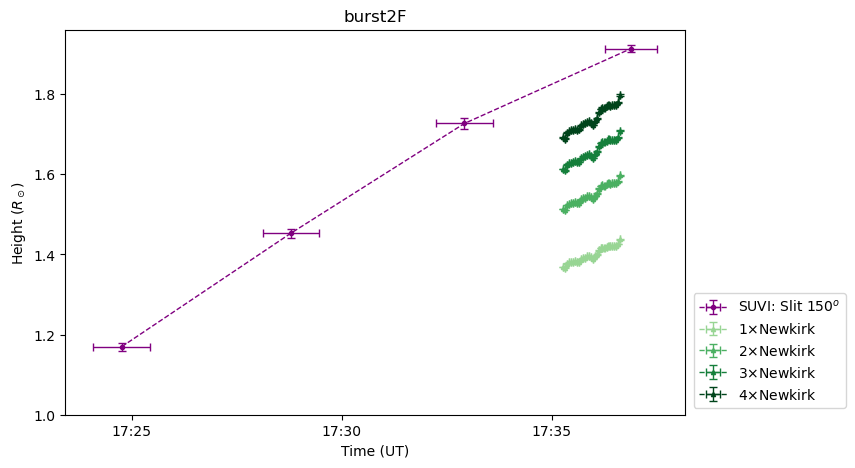

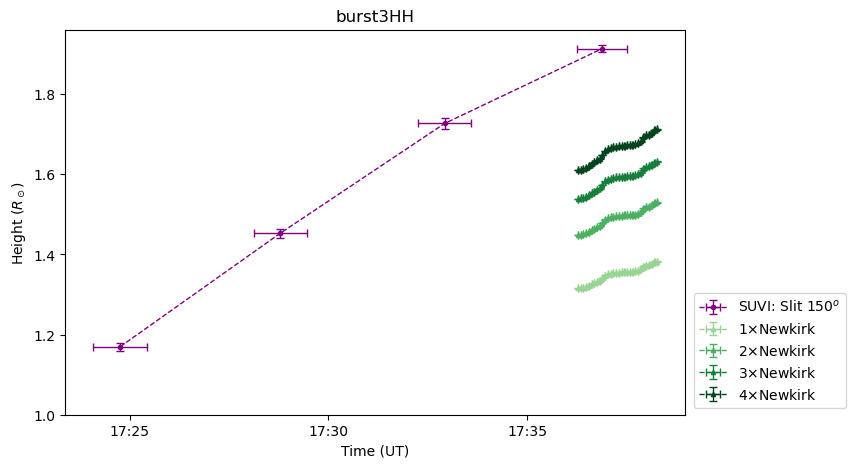

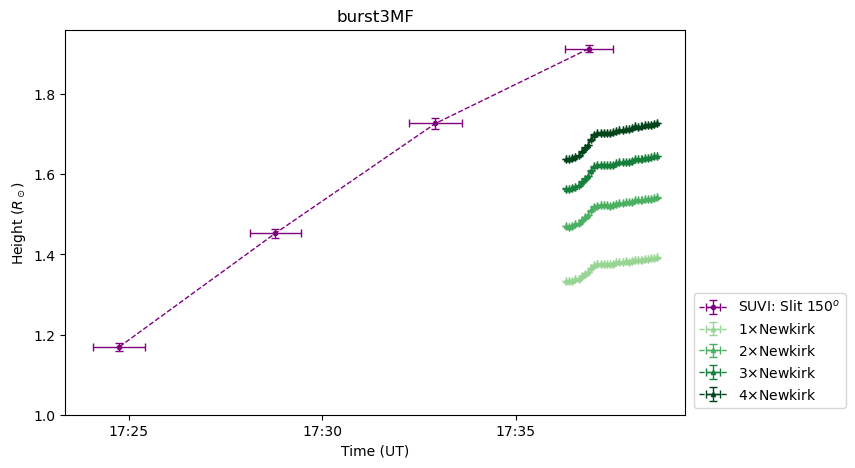

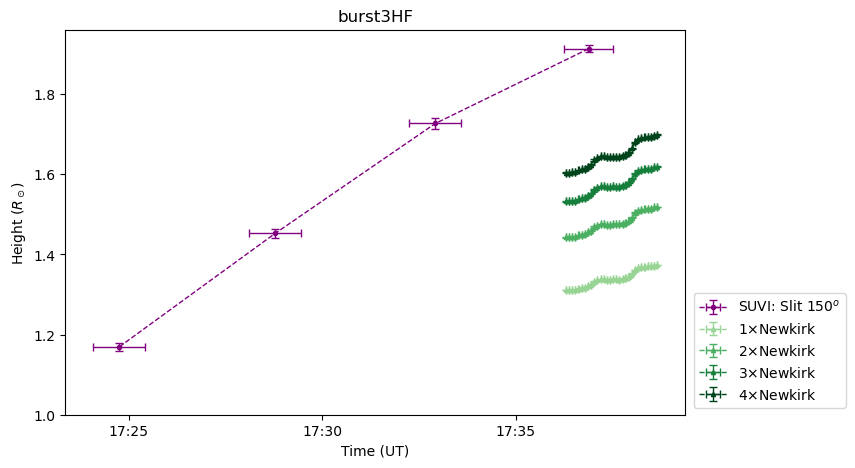

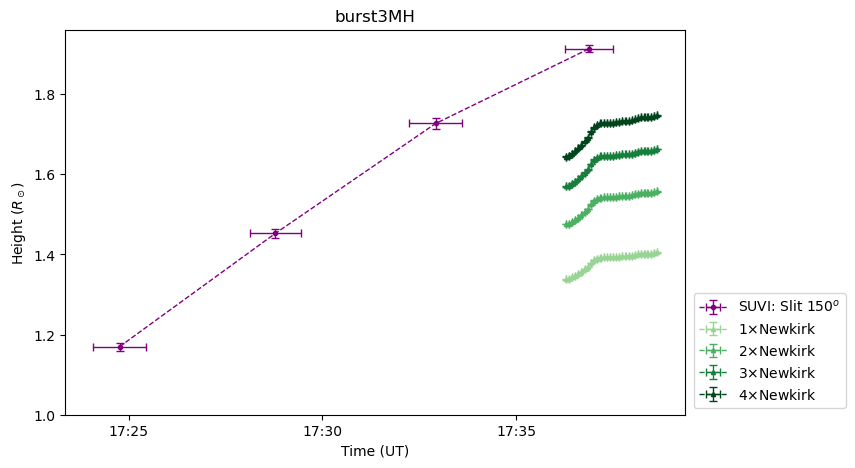

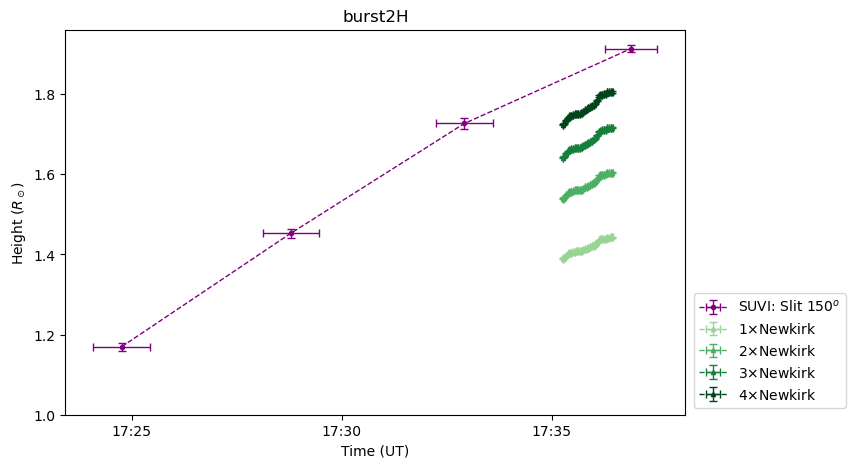

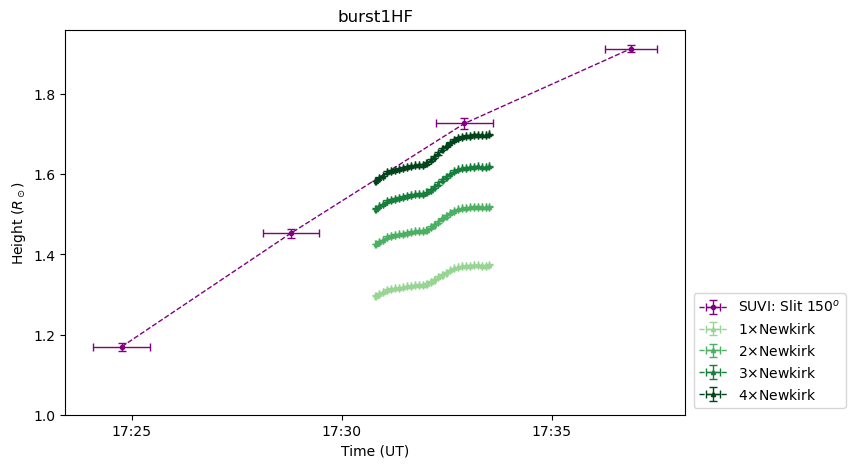

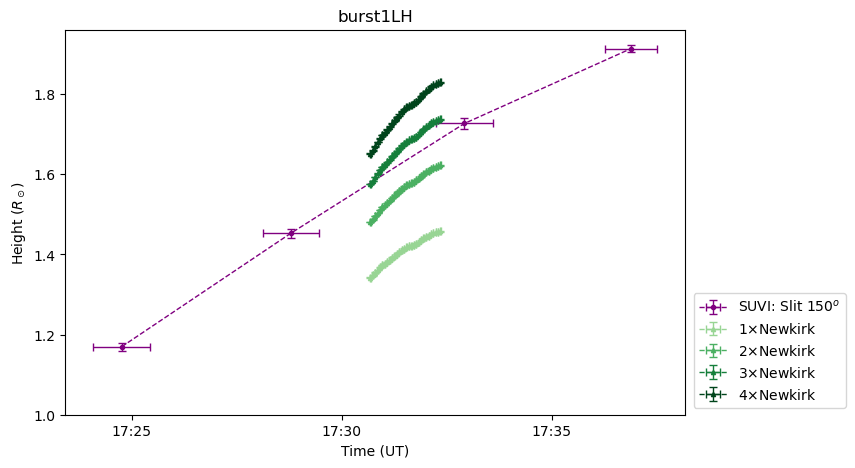

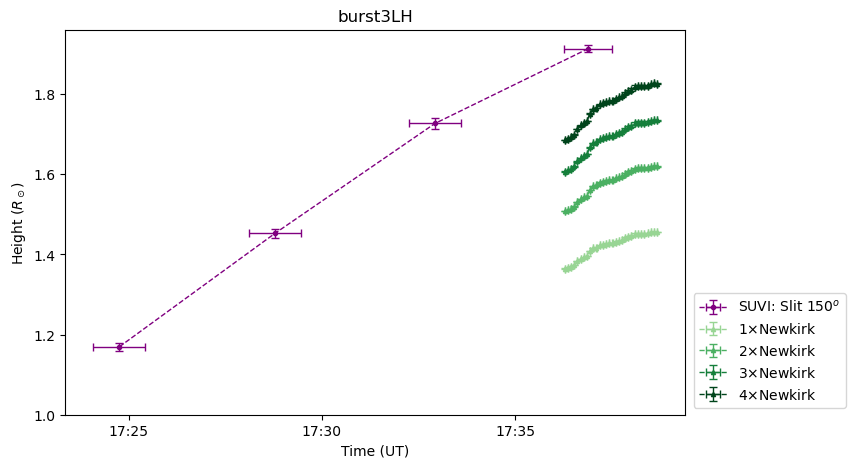

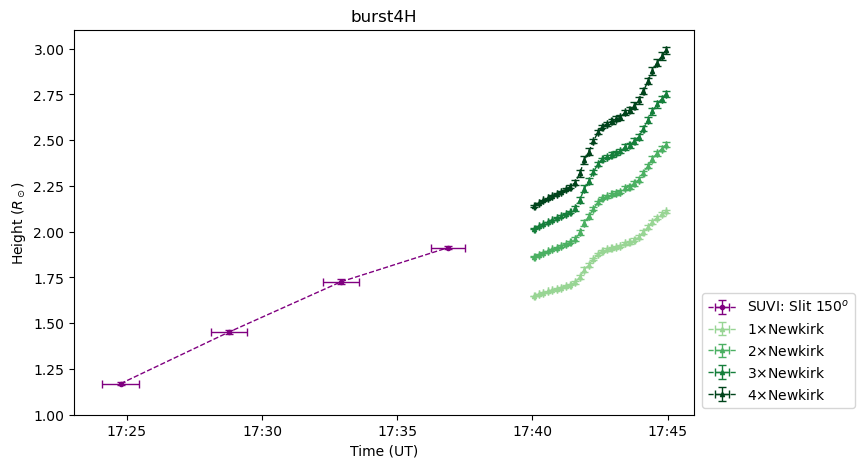

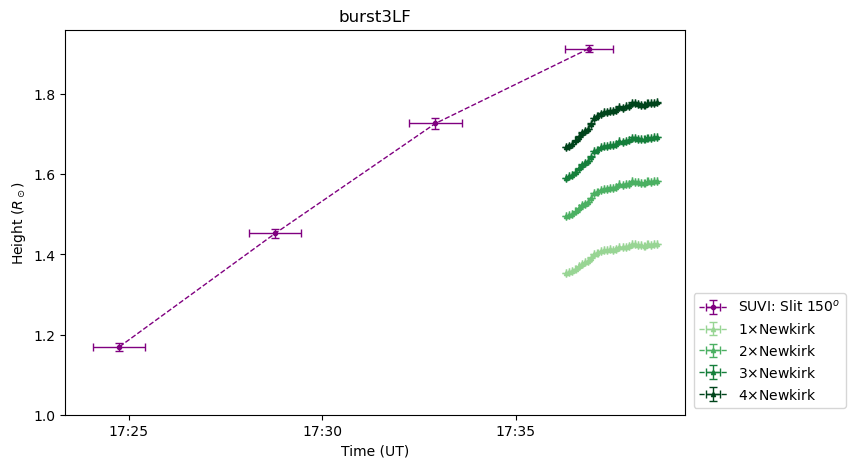

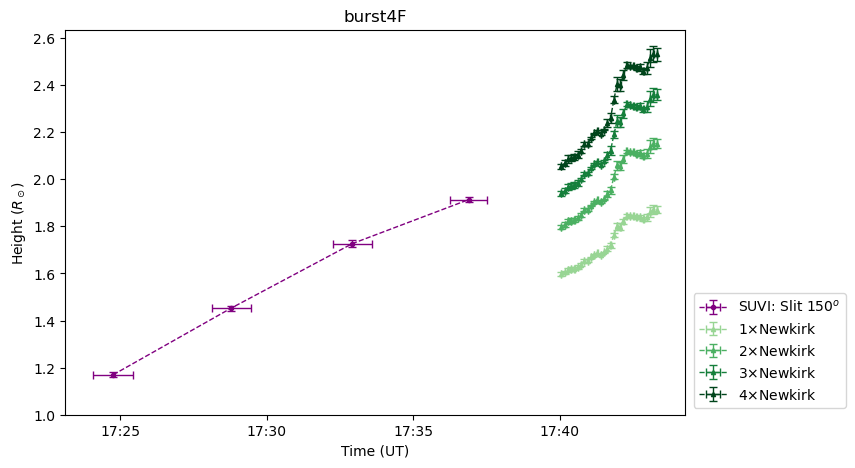

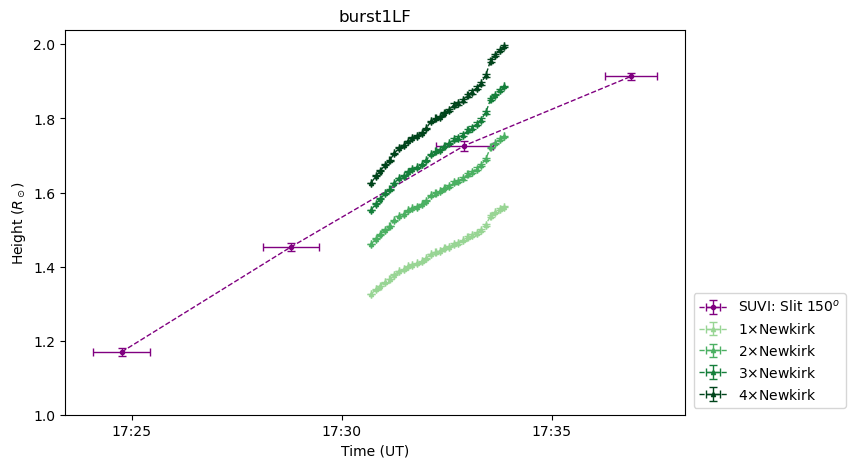

In [20]:
# plot a single slit ...
cmap_radio = plt.get_cmap('Greens')
colors_radio = [cmap_radio(i / 5) for i in range(1, 6)]

# RADIO CURVES ...
for file in radio_filenames:
    df_radio = pd.read_csv(file)
    x = df_radio['t_means']
    
    fig = plt.figure(figsize=[8,5])
    ax = fig.add_subplot(111)
    
    # SUVI CURVE ...
    suvifile = [path for path in suvi_filenames if '150' in path][0]
    df_suvi = pd.read_csv(suvifile)
    ax.errorbar(df_suvi['x_mean'], df_suvi['y_mean']/rsun_suvi,
                xerr=df_suvi['x_err'], yerr=df_suvi['y_err']/rsun_suvi,
                markersize=3, linewidth=1,
                fmt='o--', capsize=3, capthick=1, barsabove=True, color='purple',
                ecolor='purple', label=f"SUVI: Slit {suvifile.split('slit')[-1][1:4]}$^o$")
    
    # RADIO CURVES ...
    for i in range(1, 5):
        y = df_radio[f'h{i}_means']
        ax.errorbar(x, y, xerr=df_radio['t_standard_errors'], yerr=df_radio[f'h{i}_standard_errors'],
                    markersize=3, linewidth=1,
                    fmt='^--', capsize=3, capthick=1, barsabove=True, color=colors_radio[i],
                    ecolor=colors_radio[i], label=f'{i}$\\times$Newkirk')
    
    ax.set_title(f"{file.split('/')[-1].split('_')[0]}")
    ax.legend(loc='lower right', bbox_to_anchor=(1.27,0))
    ax.xaxis_date()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    # ax.xaxis.set_minor_locator(AutoMinorLocator(n=5))
    # ax.yaxis.set_minor_locator(AutoMinorLocator(n=2))
    ax.set_ylim(bottom=1)
    ax.set_xlabel('Time (UT)')
    ax.set_ylabel(r'Height ($R_\odot$)')
    plt.show()

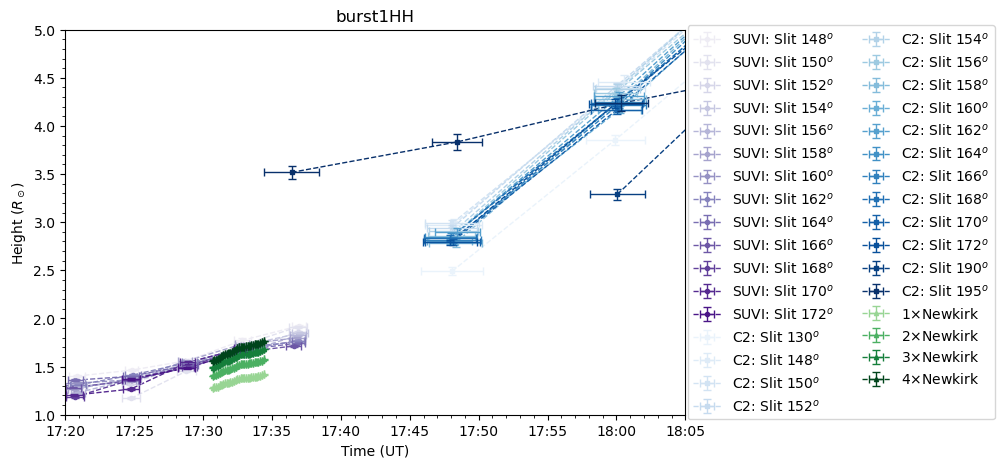

In [107]:
cmap_radio = plt.get_cmap('Greens')
colors_radio = [cmap_radio(i / 5) for i in range(1, 6)]

cmap_suvi = plt.get_cmap('Purples')
color_offset = 2
colors_suvi = [cmap_suvi((i+color_offset) / (len(suvi_filenames)+color_offset)) for i in range(len(suvi_filenames))]

cmap_c2 = plt.get_cmap('Blues')
colors_c2 = [cmap_c2(i / len(c2_click_filenames)) for i in range(1, len(c2_click_filenames)+1)]


# RADIO CURVES ...
for file in radio_filenames[:1]:
    df_radio = pd.read_csv(file)
    x = df_radio['t_means']
    
    fig = plt.figure(figsize=[8,5])
    ax = fig.add_subplot(111)

    # SUVI CURVES ...
    for i, suvifile in enumerate(suvi_filenames):
        df_suvi = pd.read_csv(suvifile)
        ax.errorbar(df_suvi['x_mean'], df_suvi['y_mean']/rsun_suvi,
                    xerr=df_suvi['x_err'], yerr=df_suvi['y_err']/rsun_suvi,
                    markersize=3, linewidth=1,
                    fmt='o--', capsize=3, capthick=1, barsabove=True, color=colors_suvi[i],
                    ecolor=colors_suvi[i], label=f"SUVI: Slit {suvifile.split('slit')[-1][1:4]}$^o$")
    
    # LASCO C2 CURVES ...
    for i, c2file in enumerate(c2_click_filenames):
        df_c2 = pd.read_csv(c2file)
        ax.errorbar(df_c2['x_mean'], df_c2['y_mean']/rsun_lasco_c2,
                    xerr=df_c2['x_err'], yerr=df_c2['y_err']/rsun_lasco_c2,
                    markersize=3, linewidth=1,
                    fmt='s--', capsize=3, capthick=1, barsabove=True, color=colors_c2[i],
                    ecolor=colors_c2[i], label=f"C2: Slit {c2file.split('slit')[-1][1:4]}$^o$")

    # RADIO CURVES ...
    for i in range(1, 5):
        y = df_radio[f'h{i}_means']
        ax.errorbar(x, y, xerr=df_radio['t_standard_errors'], yerr=df_radio[f'h{i}_standard_errors'],
                    markersize=3, linewidth=1,
                    fmt='^--', capsize=3, capthick=1, barsabove=True, color=colors_radio[i],
                    ecolor=colors_radio[i], label=f'{i}$\\times$Newkirk')

    ax.set_title(f"{file.split('/')[-1].split('_')[0]}")
    ax.set_xlabel('Time (UT)')
    ax.set_ylabel(r'Height ($R_\odot$)')
    ax.legend(loc='lower right', ncol=2, bbox_to_anchor=(1.51,-0.03))
    ax.xaxis_date()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax.xaxis.set_minor_locator(AutoMinorLocator(n=5))
    ax.yaxis.set_minor_locator(AutoMinorLocator(n=5))
    ax.set_ylim(bottom=1, top=5)
    ax.set_xlim(left=pd.Timestamp('2024-05-14 17:20'), right=pd.Timestamp('2024-05-14 18:05'))
    # fig.savefig(f"/home/mnedal/repos/dias_work/jplots/all_clicking/suvi_c2_radio/suvi_c2_{file.split('/')[-1].split('_')[0]}.pdf", format='pdf', bbox_inches='tight')
    plt.show()

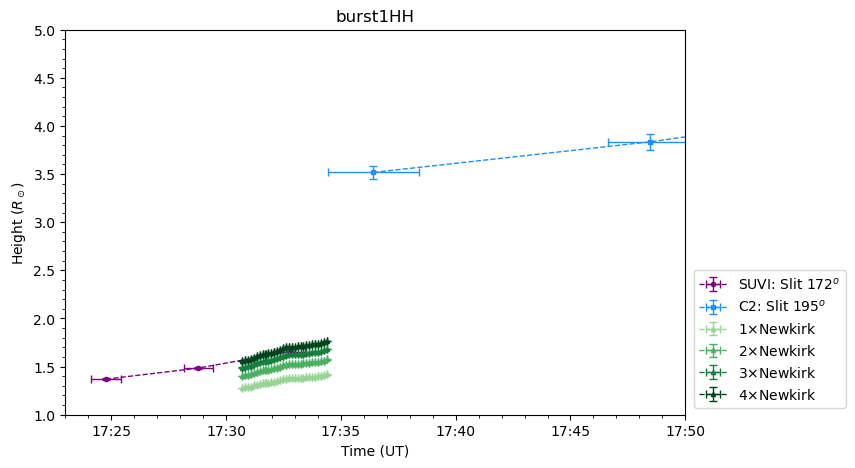

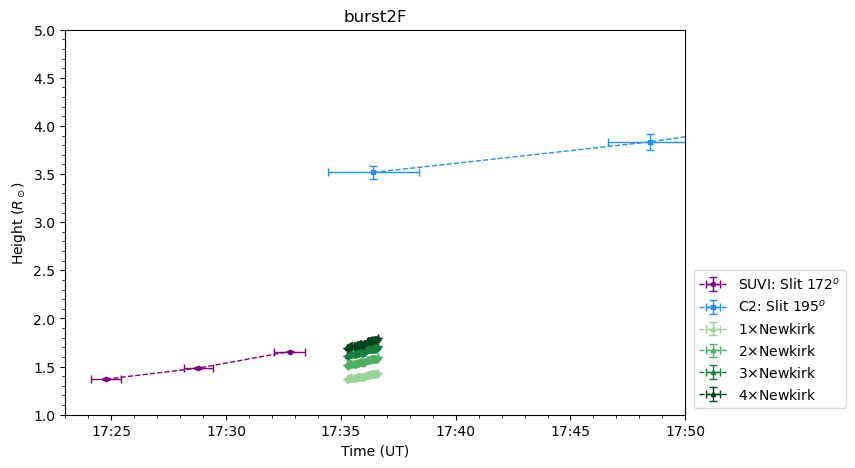

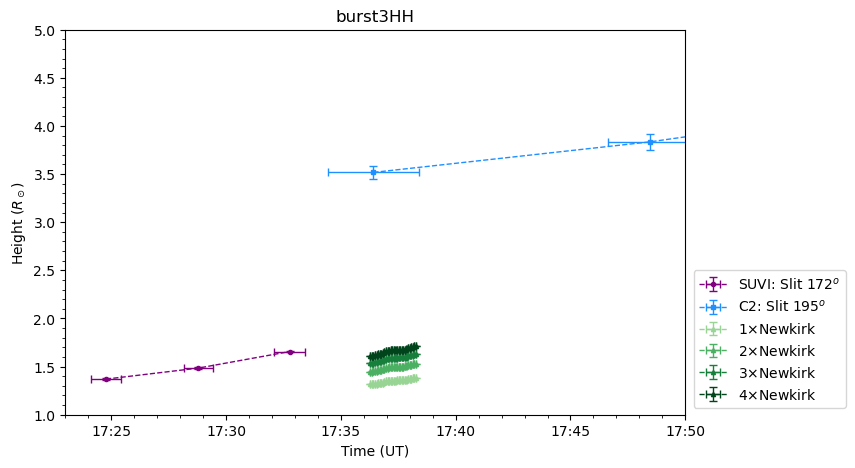

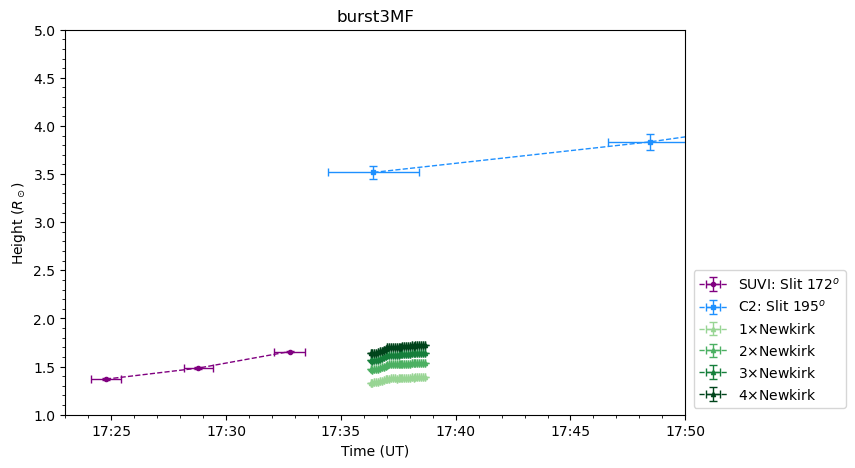

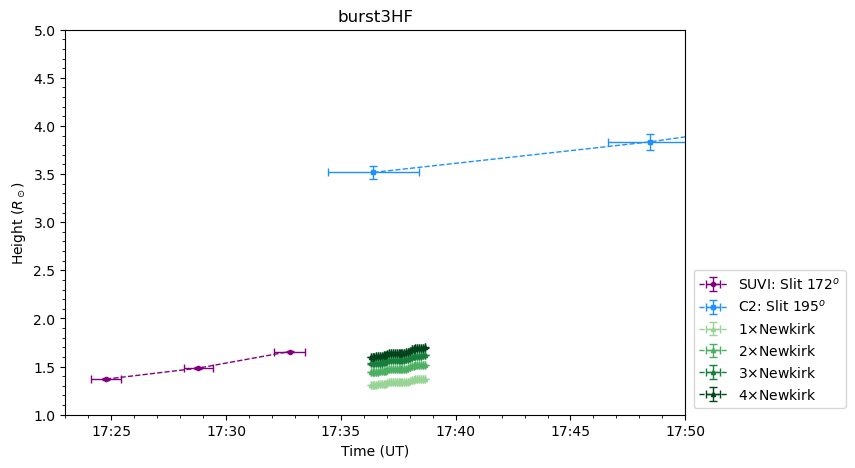

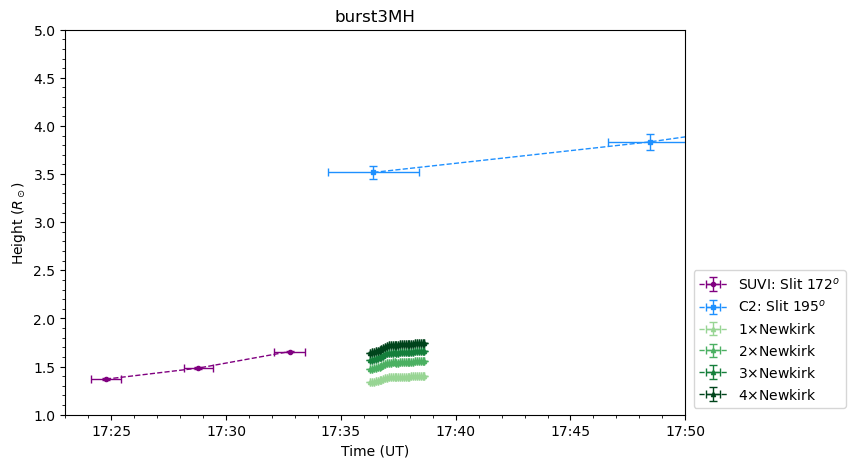

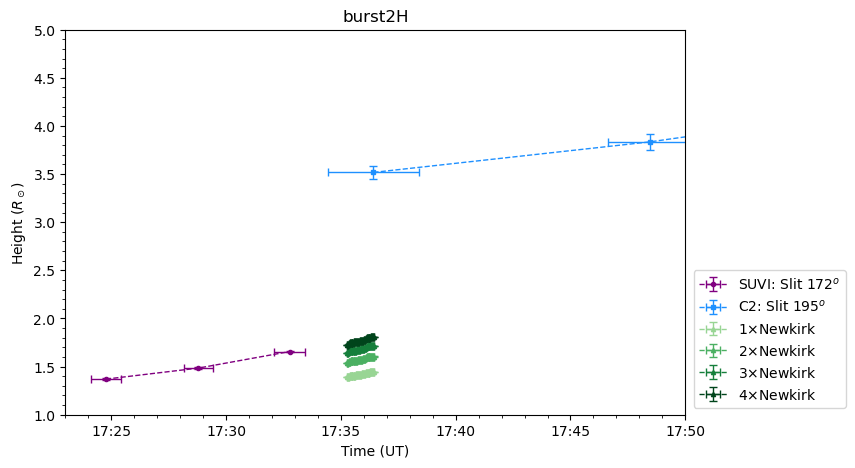

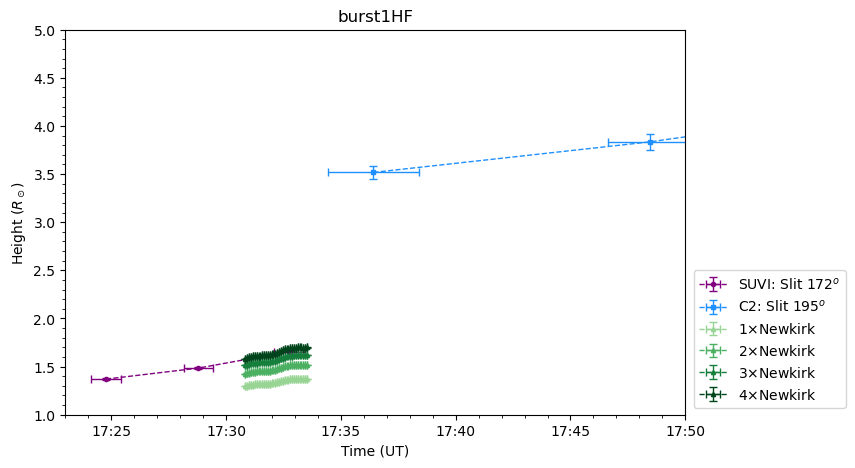

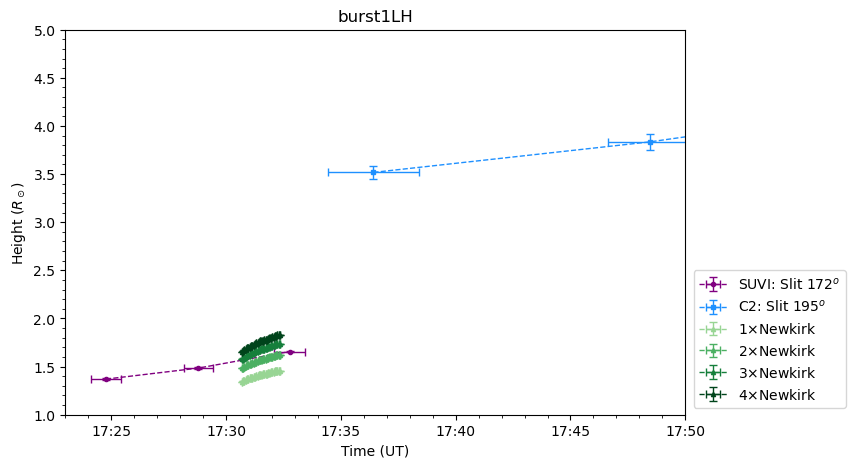

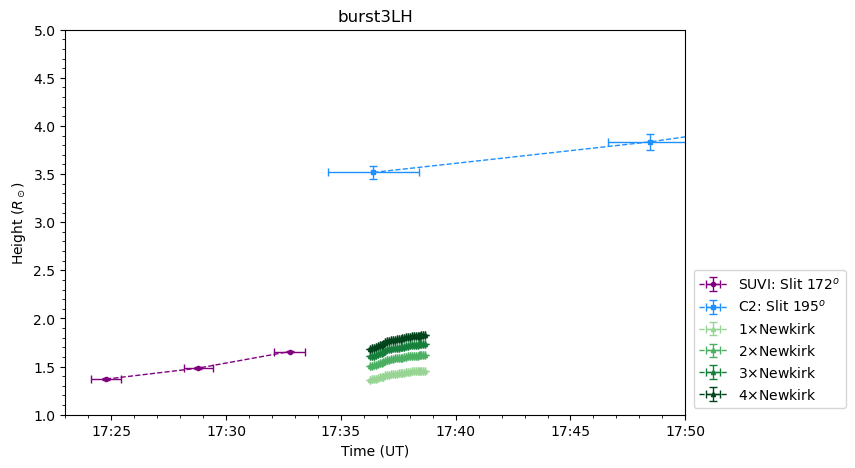

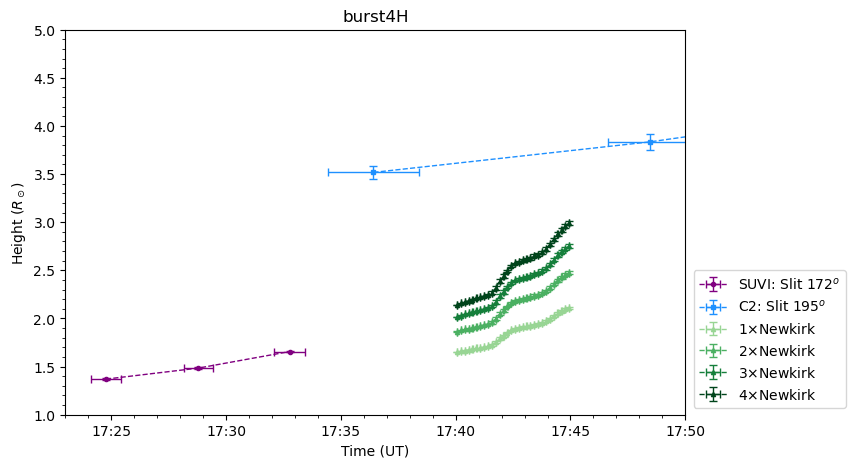

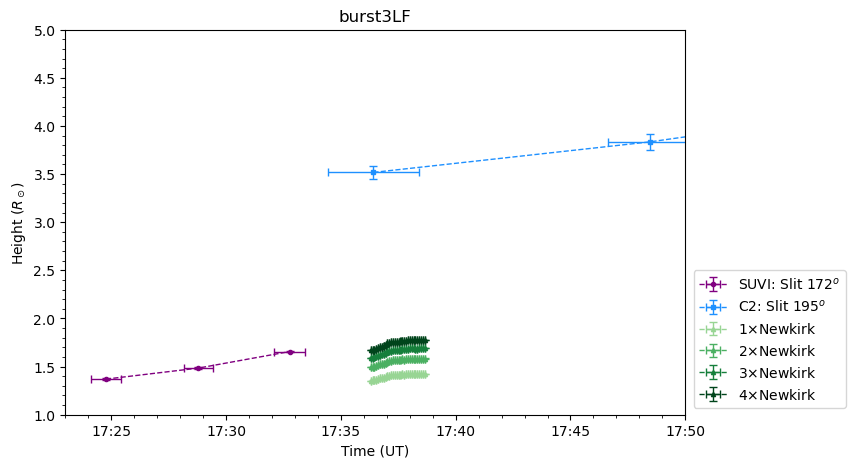

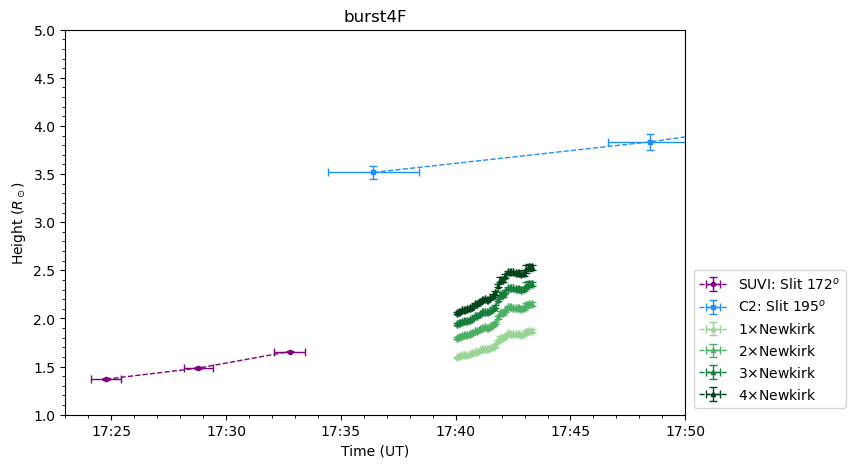

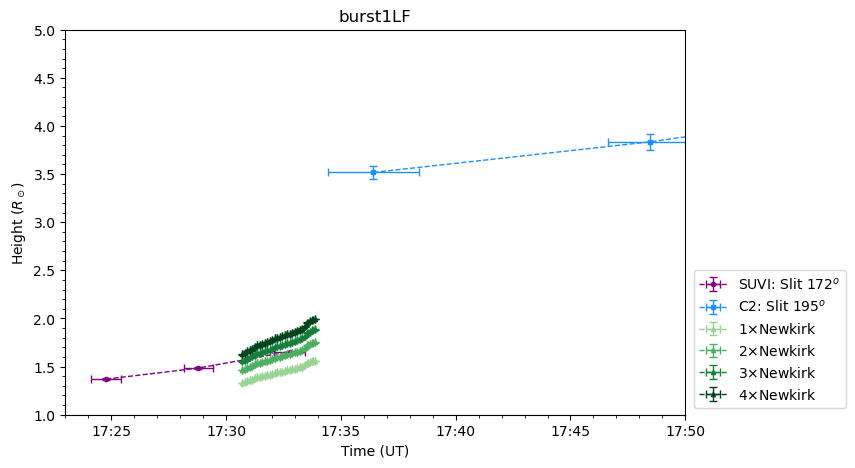

In [18]:
# plot a single slit ...
cmap_radio = plt.get_cmap('Greens')
colors_radio = [cmap_radio(i / 5) for i in range(1, 6)]

# RADIO CURVES ...
for file in radio_filenames:
    df_radio = pd.read_csv(file)
    x = df_radio['t_means']
    
    fig = plt.figure(figsize=[8,5])
    ax = fig.add_subplot(111)
    
    # SUVI CURVE ...
    suvifile = [path for path in suvi_filenames if '172' in path][0]
    df_suvi = pd.read_csv(suvifile)
    ax.errorbar(df_suvi['x_mean'], df_suvi['y_mean']/rsun_suvi,
                xerr=df_suvi['x_err'], yerr=df_suvi['y_err']/rsun_suvi,
                markersize=3, linewidth=1,
                fmt='o--', capsize=3, capthick=1, barsabove=True, color='purple',
                ecolor='purple', label=f"SUVI: Slit {suvifile.split('slit')[-1][1:4]}$^o$")
    
    # LASCO C2 CURVE ...
    c2file = [path for path in c2_click_filenames if '195' in path][0]
    df_c2 = pd.read_csv(c2file)
    ax.errorbar(df_c2['x_mean'], df_c2['y_mean']/rsun_lasco_c2,
                        xerr=df_c2['x_err'], yerr=df_c2['y_err']/rsun_lasco_c2,
                        markersize=3, linewidth=1,
                        fmt='s--', capsize=3, capthick=1, barsabove=True, color='dodgerblue',
                        ecolor='dodgerblue', label=f"C2: Slit {c2file.split('slit')[-1][1:4]}$^o$")
    
    # RADIO CURVES ...
    for i in range(1, 5):
        y = df_radio[f'h{i}_means']
        ax.errorbar(x, y, xerr=df_radio['t_standard_errors'], yerr=df_radio[f'h{i}_standard_errors'],
                    markersize=3, linewidth=1,
                    fmt='^--', capsize=3, capthick=1, barsabove=True, color=colors_radio[i],
                    ecolor=colors_radio[i], label=f'{i}$\\times$Newkirk')

    ax.set_title(f"{file.split('/')[-1].split('_')[0]}")
    ax.set_xlabel('Time (UT)')
    ax.set_ylabel(r'Height ($R_\odot$)')
    ax.legend(loc='lower right', bbox_to_anchor=(1.27,0))
    ax.xaxis_date()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax.xaxis.set_minor_locator(AutoMinorLocator(n=5))
    ax.yaxis.set_minor_locator(AutoMinorLocator(n=5))
    ax.set_ylim(bottom=1, top=5)
    ax.set_xlim(left=pd.Timestamp('2024-05-14 17:23'), right=pd.Timestamp('2024-05-14 17:50'))
    # fig.savefig(f"/home/mnedal/repos/dias_work/jplots/all_clicking/suvi_c2_radio/suvi_c2_{file.split('/')[-1].split('_')[0]}.pdf", format='pdf', bbox_inches='tight')
    plt.show()